In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
id_='2'

In [2]:
def fix_labels(label):
    if label=='Throwing':
        return 'Throwing things'
    return label

# Label Encoder

In [3]:
# import label encoder
from sklearn.preprocessing import LabelEncoder
data=pd.read_csv('./real_data/keypoints_with_labels_1.csv')
data=data.dropna(subset=['Action Label'])
y=data['Action Label'].to_numpy()
label_encoder = LabelEncoder()
data['Action Label'] = label_encoder .fit_transform(y)
# data['Action Label'].value_counts().plot(kind='bar')



# Load dataset

In [4]:
dfs = []
import os
for file in os.listdir('./real_data/'):
    print('file ', file)
    if file.endswith('.csv'):
        df = pd.read_csv(os.path.join('./real_data/', file)).dropna(subset=['Action Label'])
        print(df['Action Label'].unique())
        df['Action Label'] = df['Action Label'].apply(fix_labels)
        df['Action Label_name'] = df['Action Label'].copy()
        df['Action Label'] = label_encoder.transform(df['Action Label'])
        df['Action Label'] =df['Action Label'].astype('category')
        df['ID']= file.split('.')[0].split('_')[-1]
        df['ID']=df['ID'].astype('category')
        dfs.append(df)

file  keypoints_with_labels_1.csv
['Walking' 'Head banging' 'Sitting quietly' 'Biting' 'Using phone'
 'Throwing things' 'Eating snacks' 'Attacking']
file  keypoints_with_labels_2.csv
['Walking' 'Head banging' 'Sitting quietly' 'Biting' 'Using phone'
 'Throwing things' 'Eating snacks' 'Attacking']
file  keypoints_with_labels_3.csv
['Sitting quietly' 'Using phone' 'Head banging' 'Walking' 'Eating snacks'
 'Throwing things' 'Attacking' 'Biting']
file  keypoints_with_labels_5.csv
['Walking' 'Head banging' 'Sitting quietly' 'Biting' 'Using phone'
 'Throwing' 'Eating snacks' 'Attacking' 'Throwing things']


<Axes: xlabel='Action Label'>

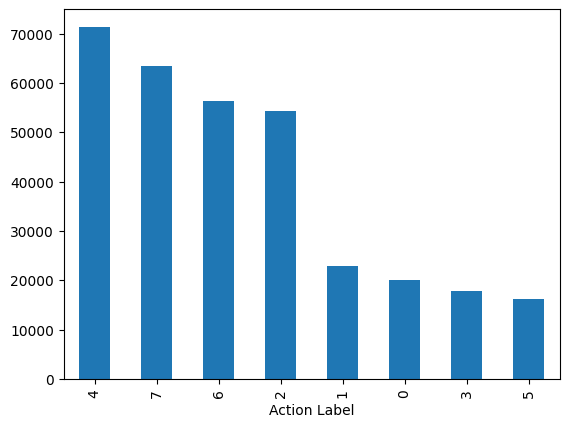

In [5]:
final_df=pd.concat(dfs, ignore_index=True)
final_df['Action Label'].value_counts().plot(kind='bar')

# Data Visualization

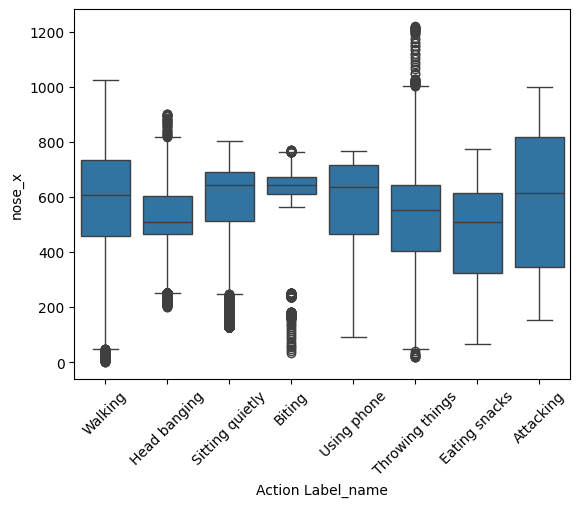

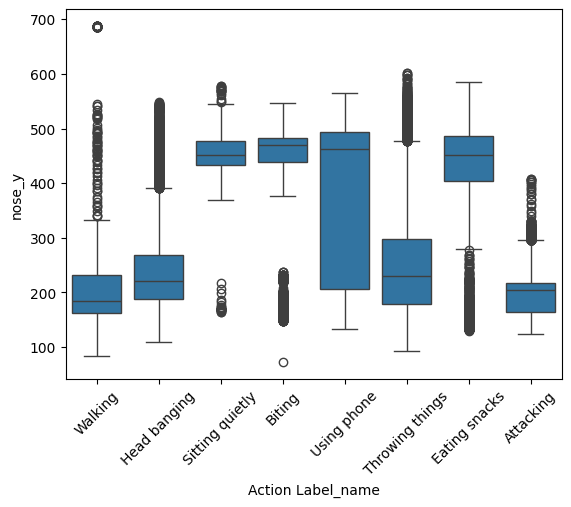

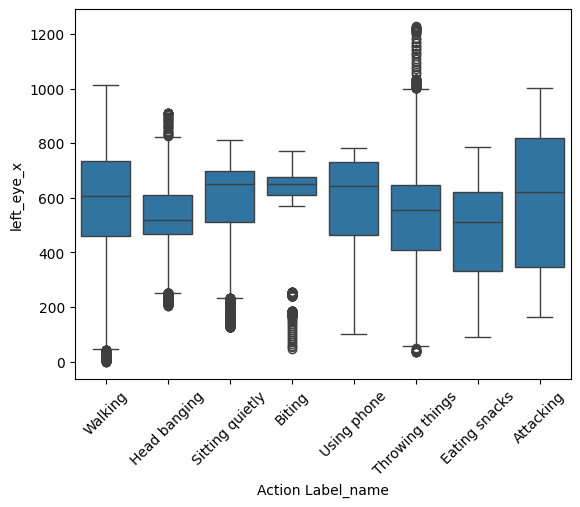

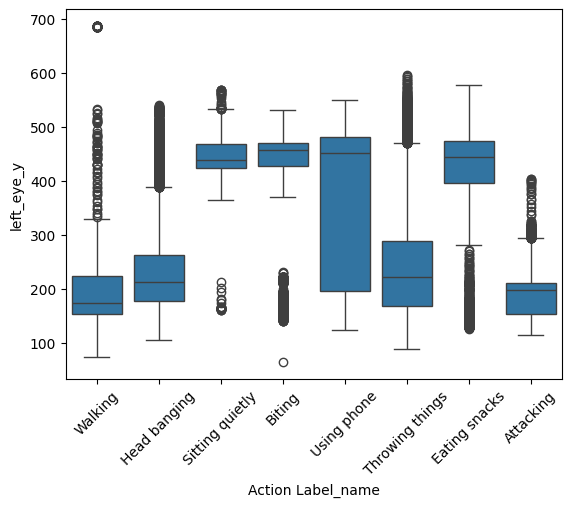

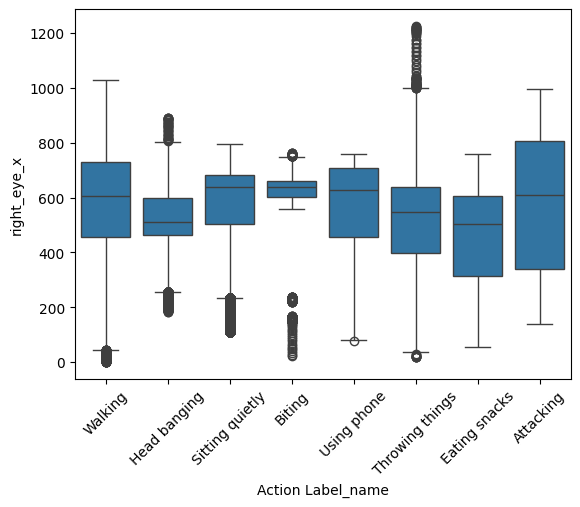

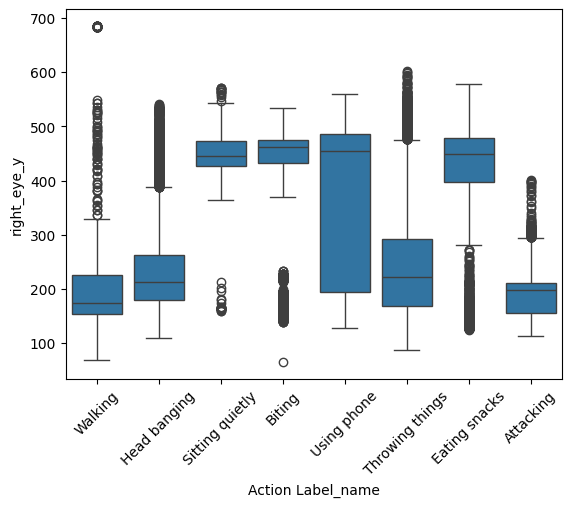

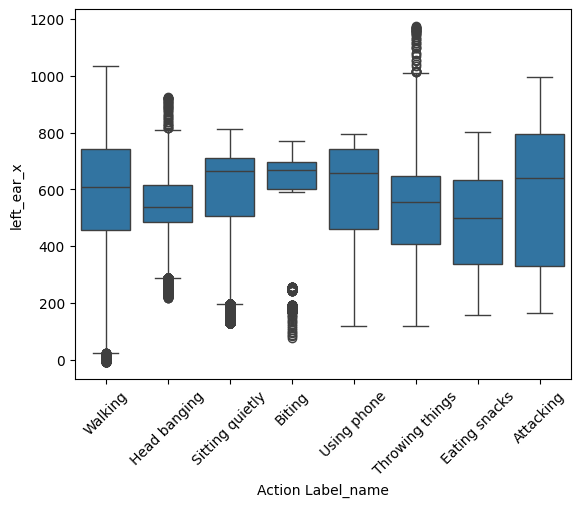

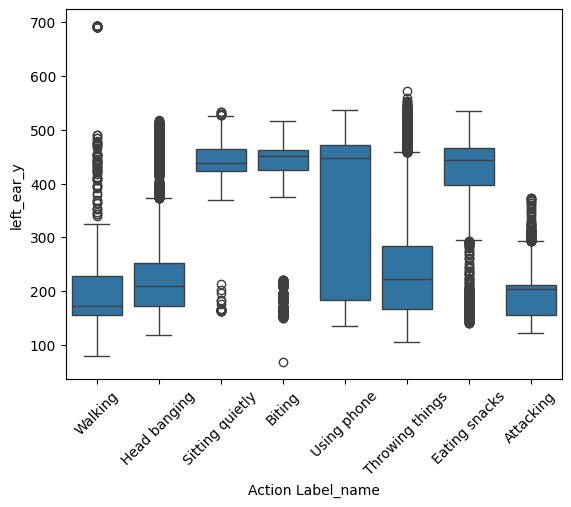

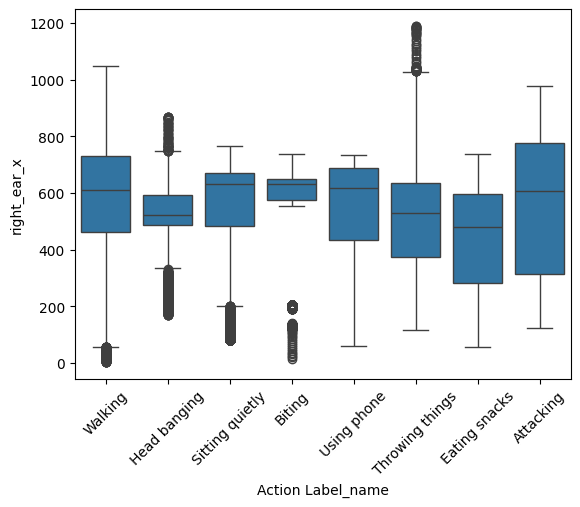

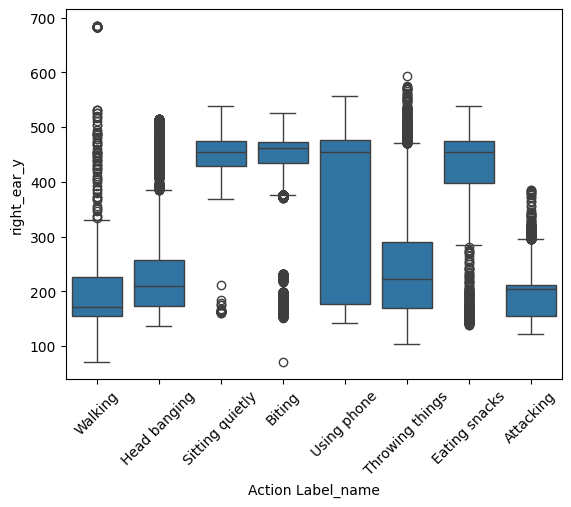

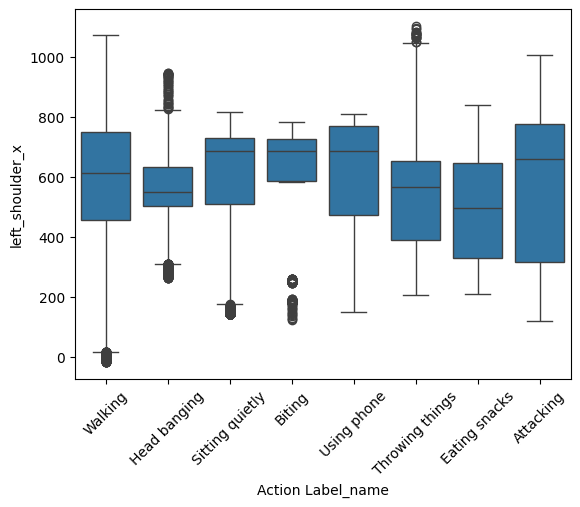

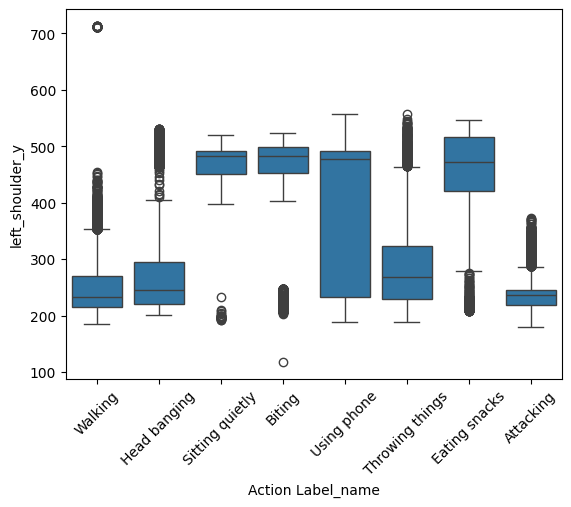

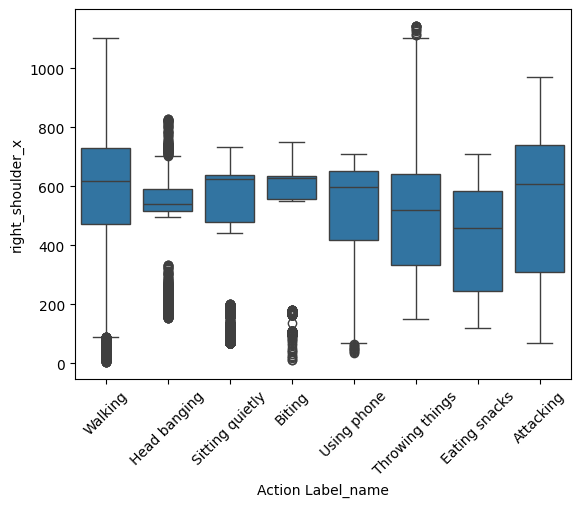

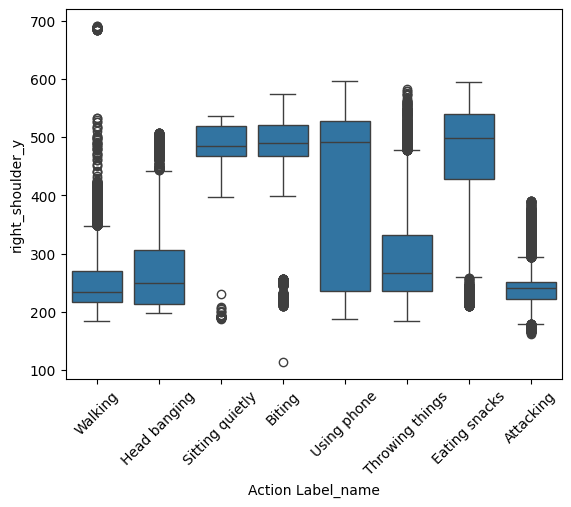

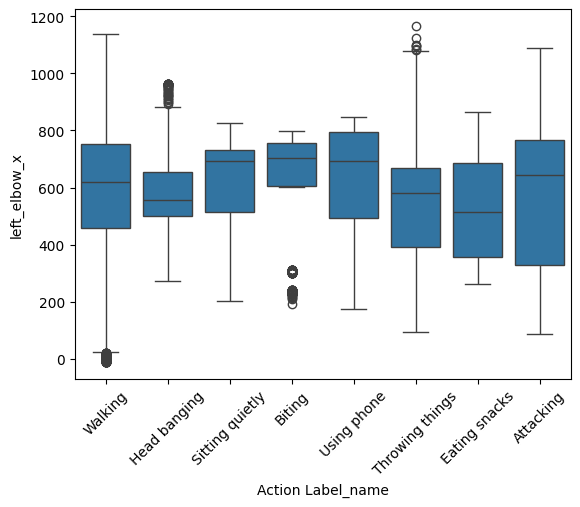

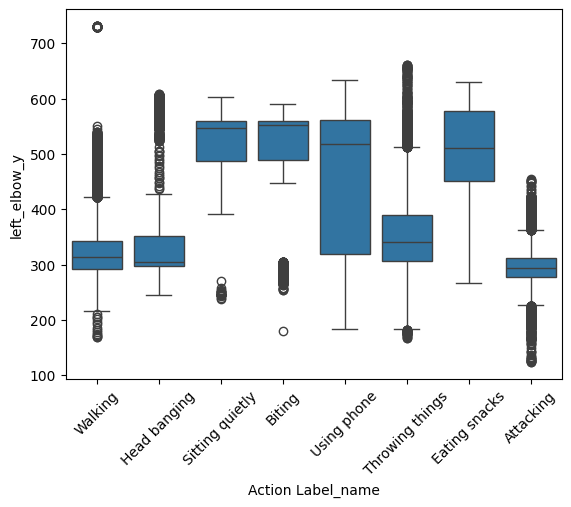

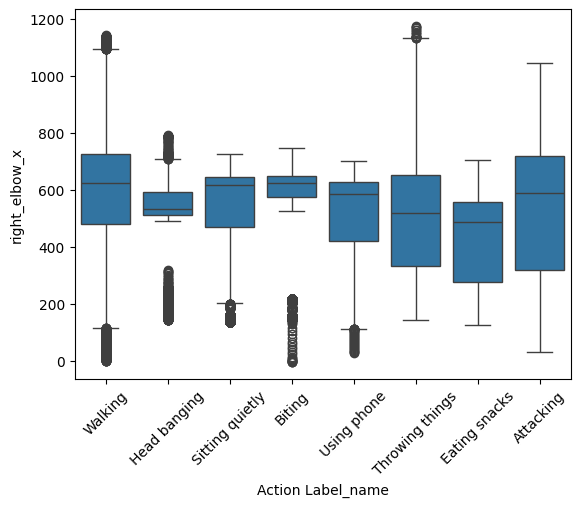

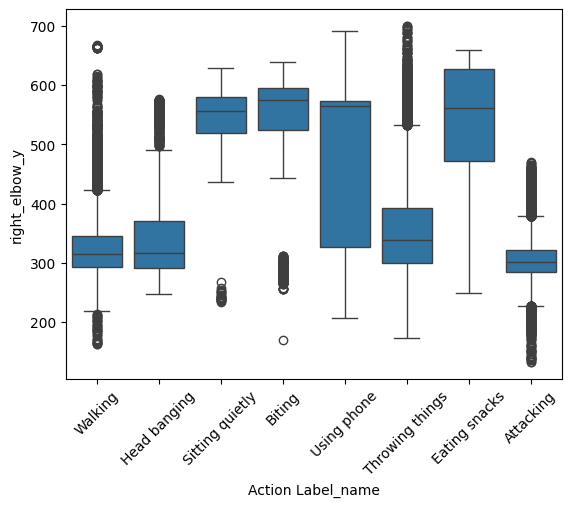

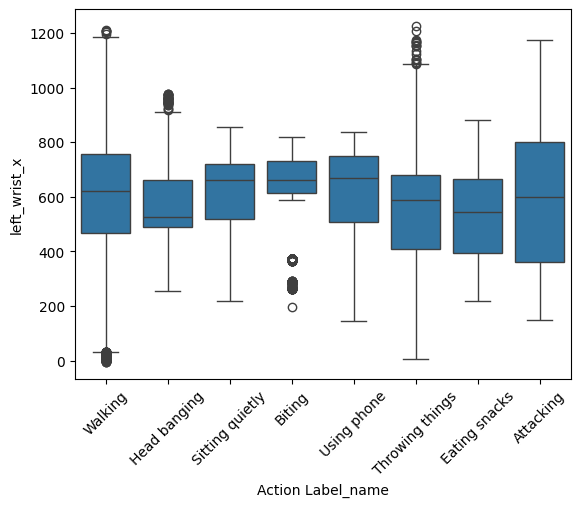

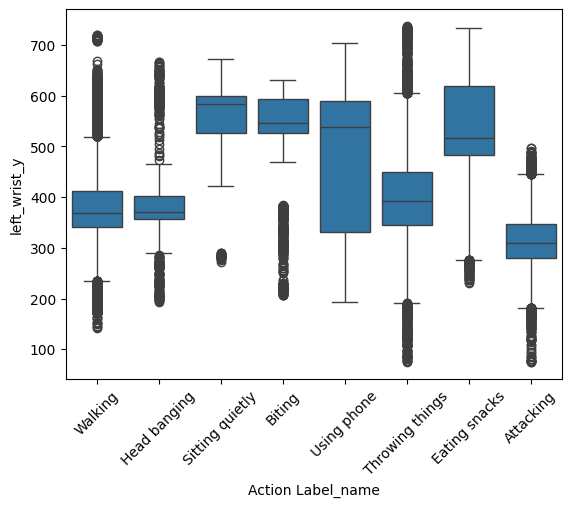

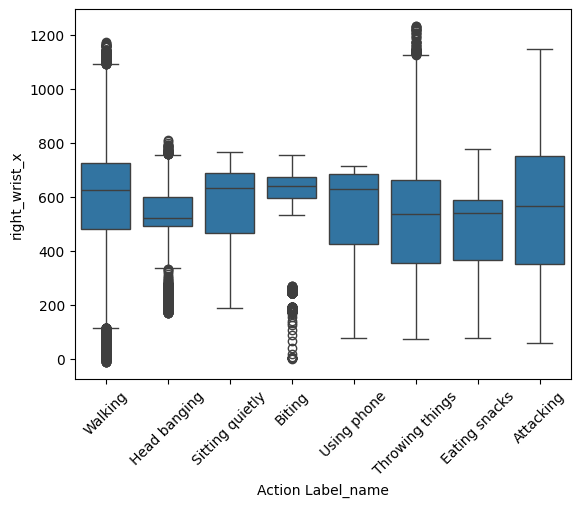

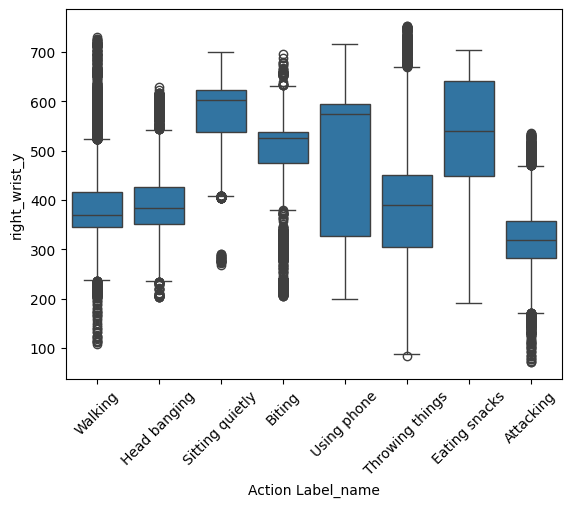

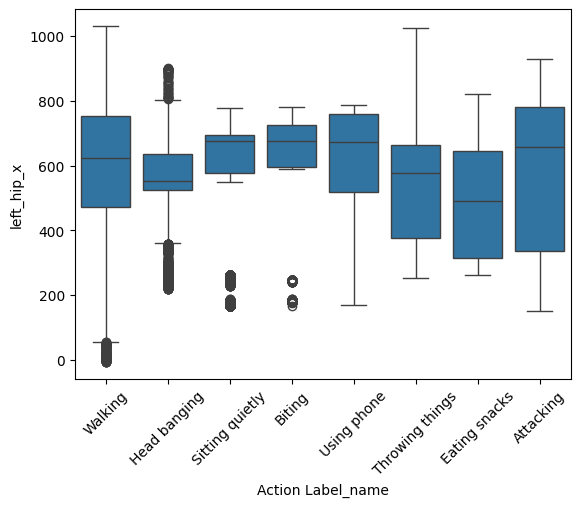

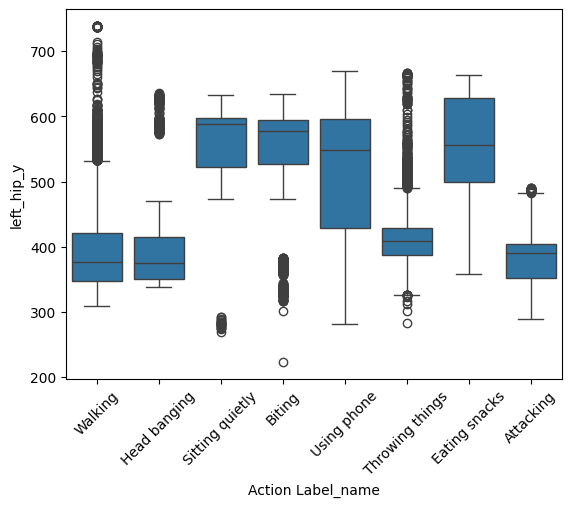

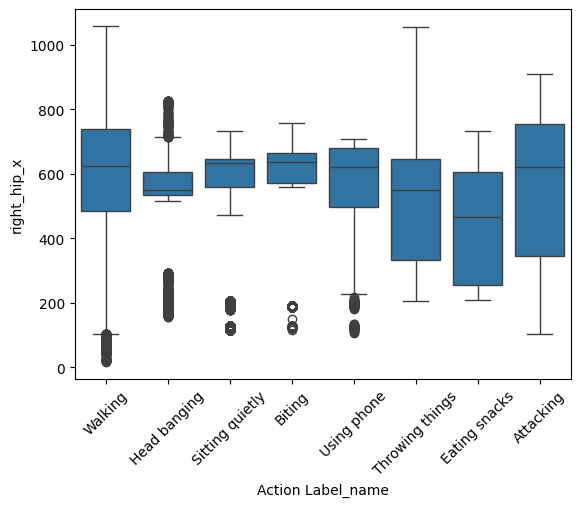

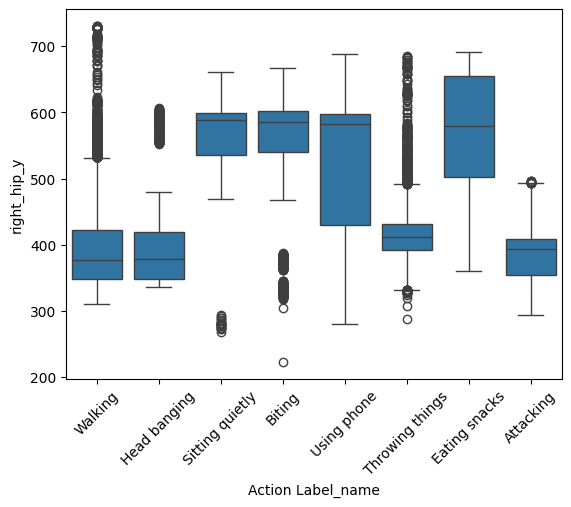

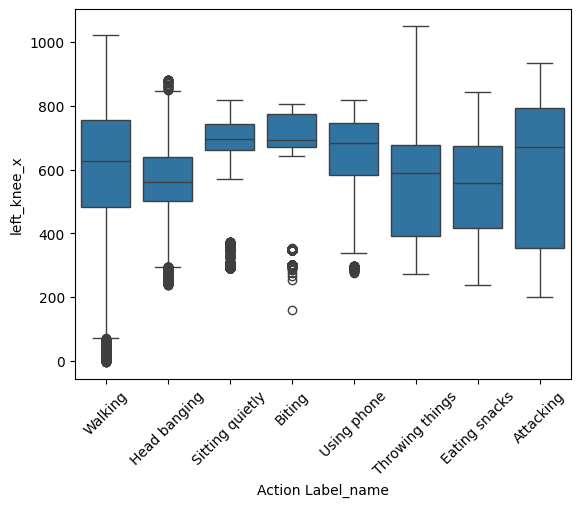

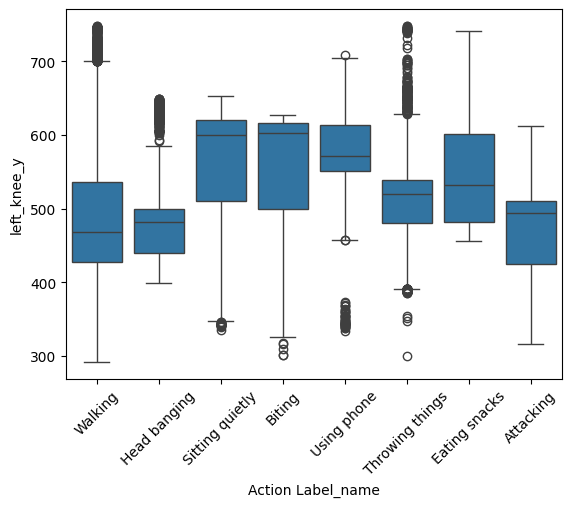

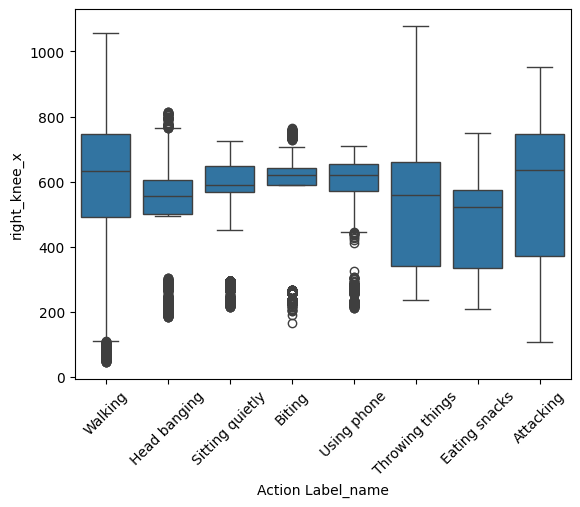

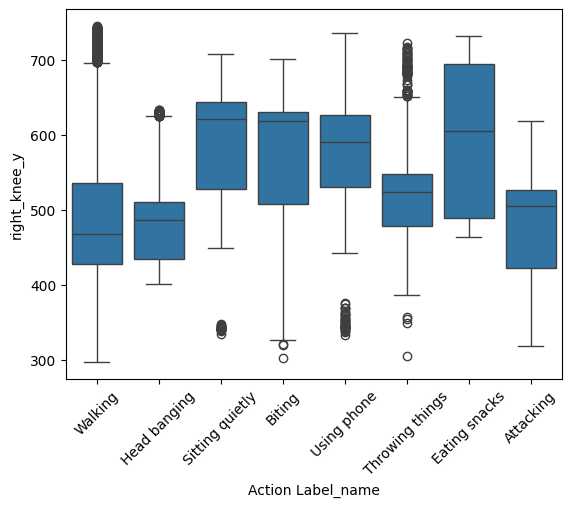

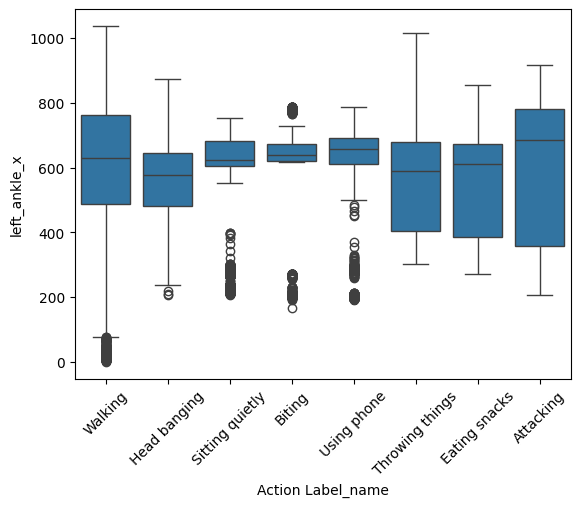

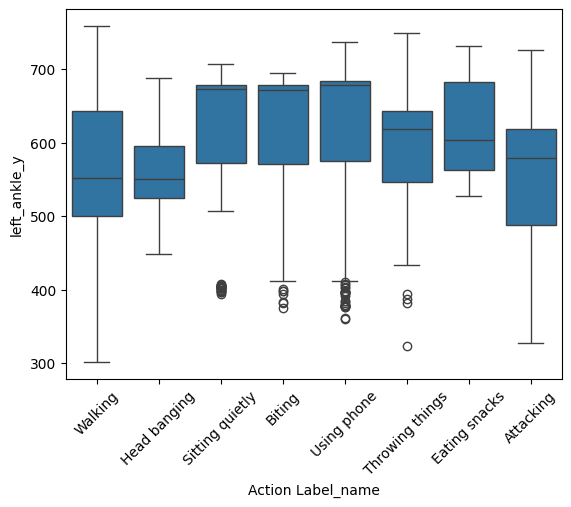

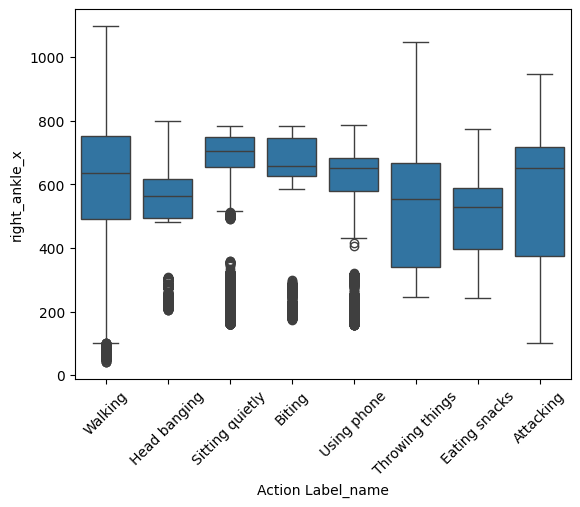

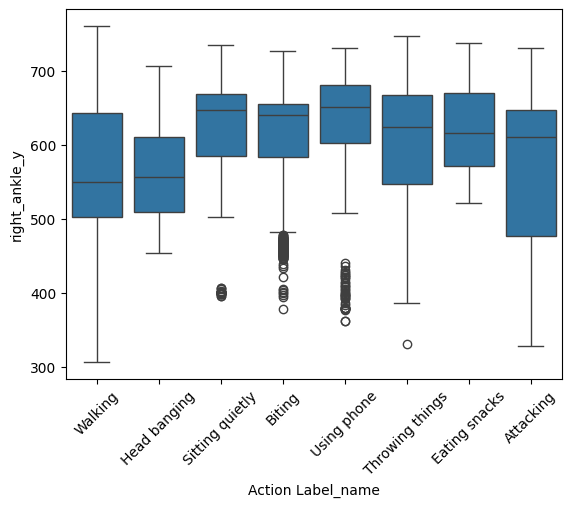

In [6]:
for col in data.columns:
    if col in ['Action Label','frame_id','Action Label_name', 'ID']:
        continue
    sns.boxplot(x='Action Label_name', y=col, data=final_df)
    plt.xticks(rotation=45)

    plt.show()

# Split train-test

In [7]:
final_df_train=final_df[final_df['ID']!=id_].drop('Action Label_name', axis=1)
final_df_test=final_df[final_df['ID']==id_].drop('Action Label_name', axis=1)

In [8]:
final_df_test

frame_id  nose_x   nose_y  left_eye_x  left_eye_y  right_eye_x  \
73050          0  509.00  223.250       513.0     218.000       503.25   
73051          1  511.75  223.375       515.5     218.125       505.75   
73052          2  514.50  223.625       518.0     218.375       508.50   
73053          3  517.00  223.750       521.0     218.500       511.00   
73054          4  521.00  224.000       524.5     218.750       515.00   
...          ...     ...      ...         ...         ...          ...   
144295     74575  612.00  213.875       618.5     207.375       611.50   
144296     74576  609.50  213.875       616.0     207.250       609.50   
144297     74577  606.50  214.250       612.5     207.625       607.00   
144298     74578  604.00  214.500       610.0     208.000       604.50   
144299     74579  600.00  215.250       605.5     208.375       600.50   

        right_eye_y  left_ear_x  left_ear_y  right_ear_x  ...  left_knee_x  \
73050       218.875       519.5     219.500       494.50  ...        552.0   
73051       219.125       521.0     219.125       496.50  ...        553.0   
73052       219.375       523.0     219.875       498.75  ...        555.0   
73053       219.375       526.0     220.000       501.50  ...        556.5   
73054       219.625       529.0     220.250       504.75  ...        558.5   
...             ...         ...         ...          ...  ...          ...   
144295      207.125       640.5     211.000       621.00  ...        673.5   
144296      207.250       637.5     210.500       620.00  ...        672.5   
144297      207.500       634.0     211.000       619.50  ...        672.0   
144298      208.000       630.5     211.125       618.50  ...        669.5   
144299      208.750       626.0     210.750       615.50  ...        668.0   

        left_knee_y  right_knee_x  right_knee_y  left_ankle_x  left_ankle_y  \
73050        368.00         518.0        373.00         553.5        414.50   
73051        368.00         518.5        373.00         557.0        415.00   
73052        368.50         519.0        373.00         561.0        416.25   
73053        369.25         519.5        373.50         563.0        417.00   
73054        369.50         520.5        374.00         563.5        417.00   
...             ...           ...           ...           ...           ...   
144295       429.50         619.0        421.00         685.0        490.50   
144296       429.00         618.5        421.00         685.0        490.50   
144297       429.50         618.0        422.25         685.5        490.50   
144298       429.00         617.0        422.25         685.5        490.25   
144299       429.00         615.0        424.00         686.0        490.00   

        right_ankle_x  right_ankle_y  Action Label  ID  
73050           521.5         415.00             7   2  
73051           522.0         415.50             7   2  
73052           522.5         415.00             7   2  
73053           522.0         415.00             7   2  
73054           522.5         415.50             7   2  
...               ...            ...           ...  ..  
144295          628.5         476.25             0   2  
144296          623.0         476.75             0   2  
144297          619.0         477.50             0   2  
144298          615.0         477.75             0   2  
144299          613.0         478.50             0   2  

[71250 rows x 37 columns]

# Extract time series domain features
## In this tutorial tsfel was chosen to demonstrate to you. But you can use any library or you may even self writing code for that :)

In [9]:

personal_dir='./tsfel_feat.json'
feature_path='./custom_features.py'
window_duration=5#seconds

In [10]:
from tsfel.utils.add_personal_features import add_feature_json
add_feature_json('./custom_features.py',personal_dir)

Feature Mode was added.


In [11]:
import tsfel
cfg= tsfel.get_features_by_domain(['statistical','Custom','temporal'],json_path=personal_dir)
# You can chose from ['statistical', 'temporal', 'spectral', 'fractal', 'Custom'] domains


# Extract time series domain features using TSFEL
final_df_train_tsfel = tsfel.time_series_features_extractor(cfg, final_df_train,
                                                            window_size=30*window_duration, overlap=0.5, fs=30,
                                                            features_path=feature_path)
final_df_test_tsfel = tsfel.time_series_features_extractor(cfg, final_df_test, 
                                                           window_size=30*window_duration, overlap=0, fs=30,
                                                           features_path=feature_path)



In [12]:
# save Action Label as feature
label_train = final_df_train_tsfel['Action Label_Mode']
label_test = final_df_test_tsfel['Action Label_Mode']

# remove Action Label and id columns from train set
final_df_train_tsfel = final_df_train_tsfel.loc[:, ~final_df_train_tsfel.columns.str.contains('Action Label|id|ID')]
final_df_train_tsfel['Action Label'] = label_train  #add Action Label column back

# remove Action Label and id columns from test set
final_df_test_tsfel = final_df_test_tsfel.loc[:, ~final_df_test_tsfel.columns.str.contains('Action Label|id|ID')]
final_df_test_tsfel['Action Label'] = label_test #add Action Label column back

In [13]:
X_train = final_df_train_tsfel.drop(columns=['Action Label']).astype(float)
y_train= final_df_train_tsfel['Action Label'].astype(int)
X_test = final_df_test_tsfel.drop(columns=['Action Label']).astype(float)
y_test= final_df_test_tsfel['Action Label'].astype(int)

In [14]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3350, 1462), (3350,), (475, 1462), (475,))

# Machine learning models

Accuracy: 0.5642105263157895
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76        38
           1       0.12      0.89      0.21        19
           2       0.91      0.73      0.81        98
           3       0.59      1.00      0.74        26
           4       0.00      0.00      0.00        98
           5       1.00      0.35      0.51        26
           6       0.30      0.27      0.29        73
           7       1.00      0.99      0.99        97

    accuracy                           0.56       475
   macro avg       0.59      0.62      0.54       475
weighted avg       0.59      0.56      0.55       475



<Axes: >

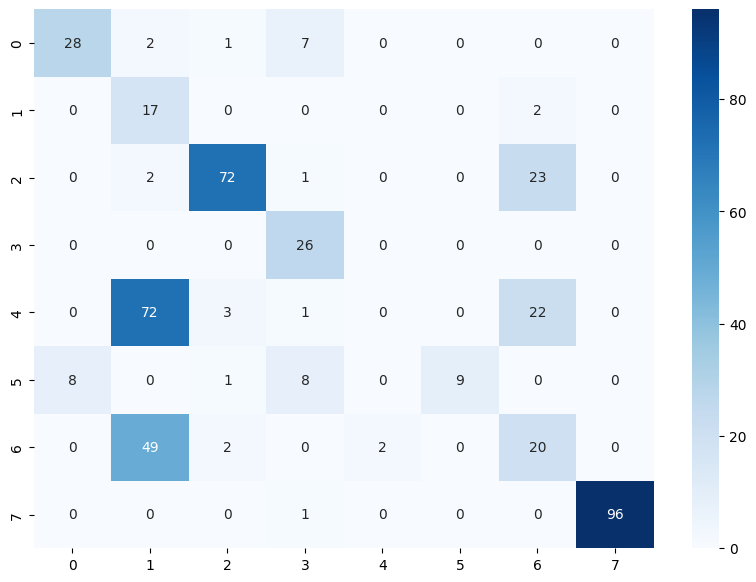

In [15]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# model = XGBClassifier(eval_metric='mlogloss',base_score=0.5, use_label_encoder=True)
model=HistGradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
ax,fig=plt.subplots(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt='d', cmap='Blues')

In [16]:
labels= label_encoder.classes_
labels

array(['Attacking', 'Biting', 'Eating snacks', 'Head banging',
       'Sitting quietly', 'Throwing things', 'Using phone', 'Walking'],
      dtype=object)

## But can it be better???????


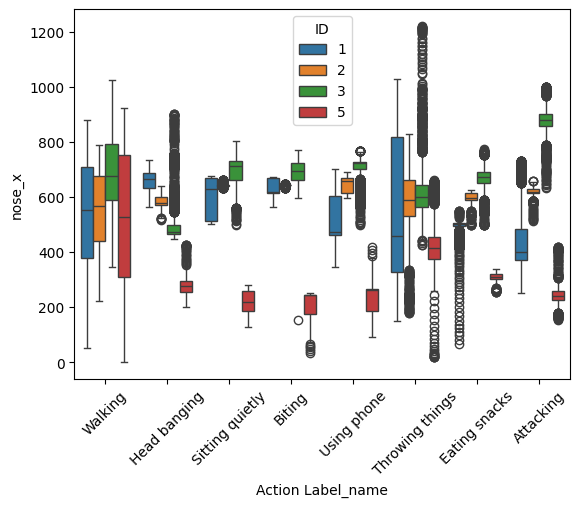

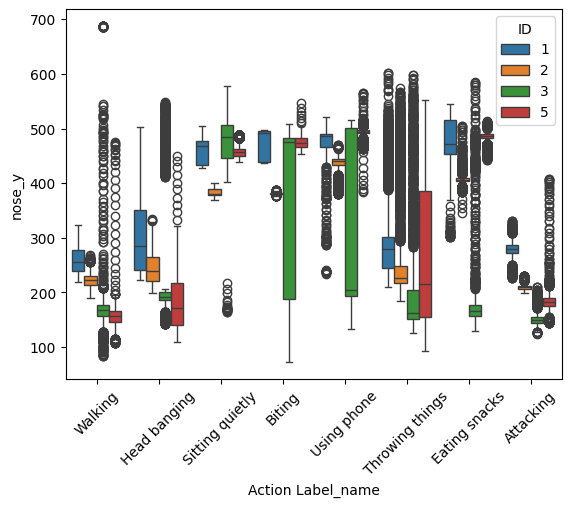

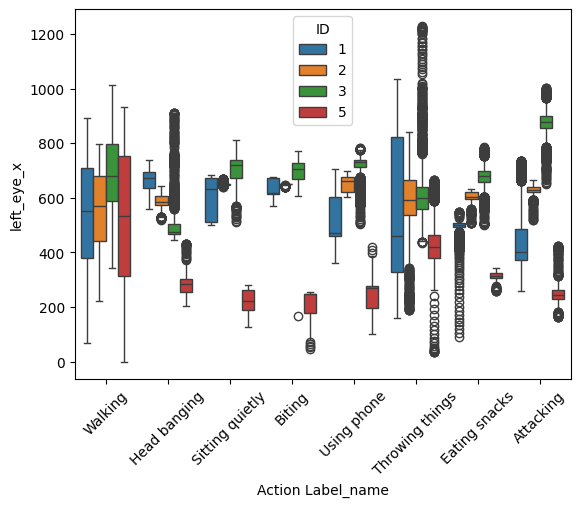

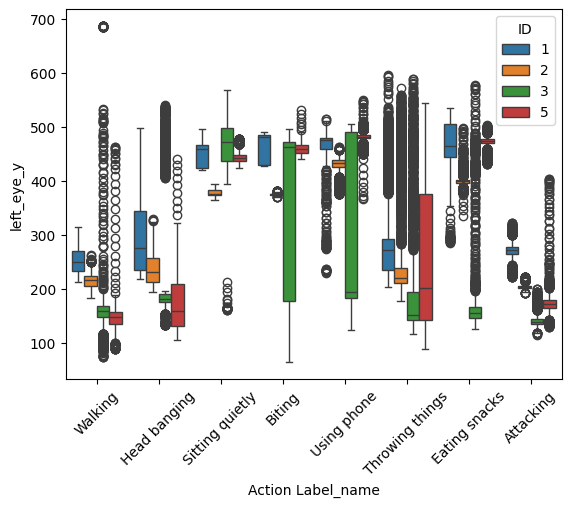

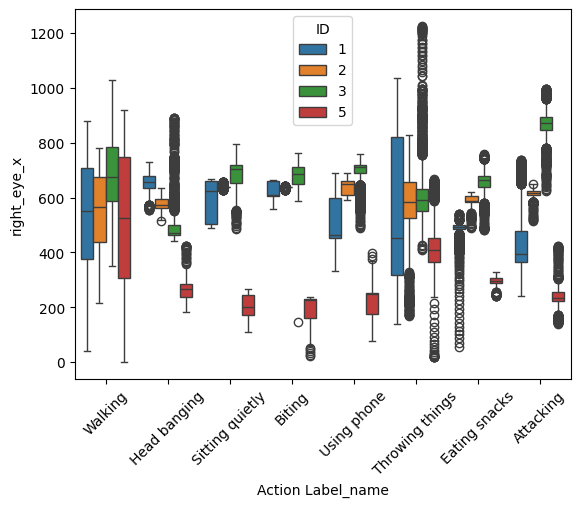

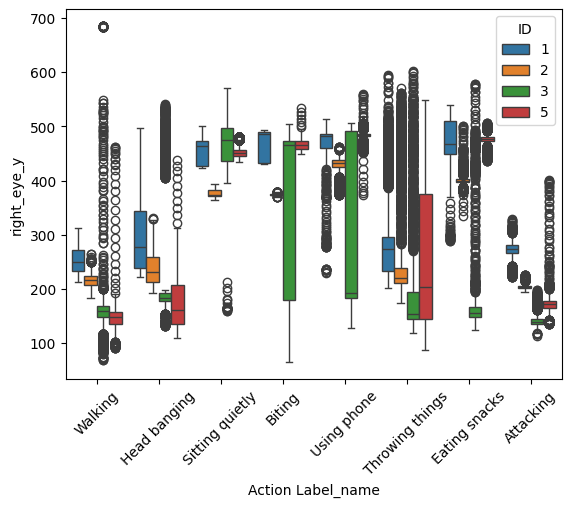

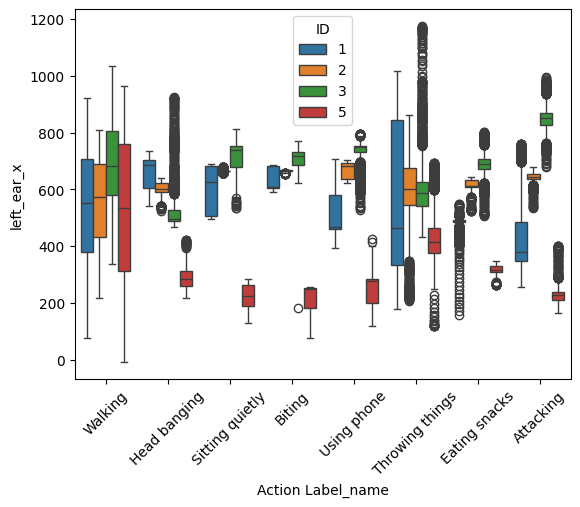

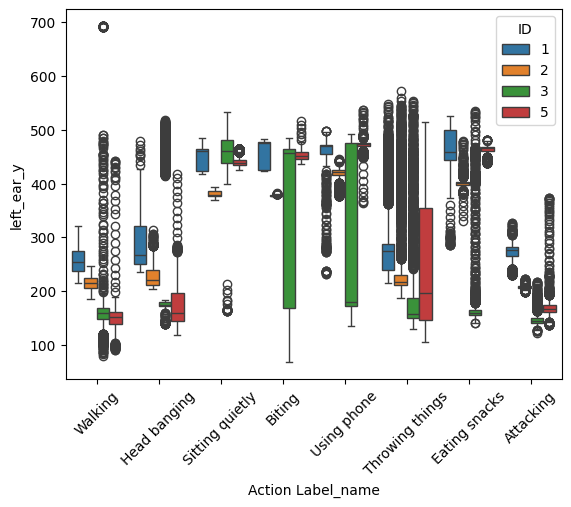

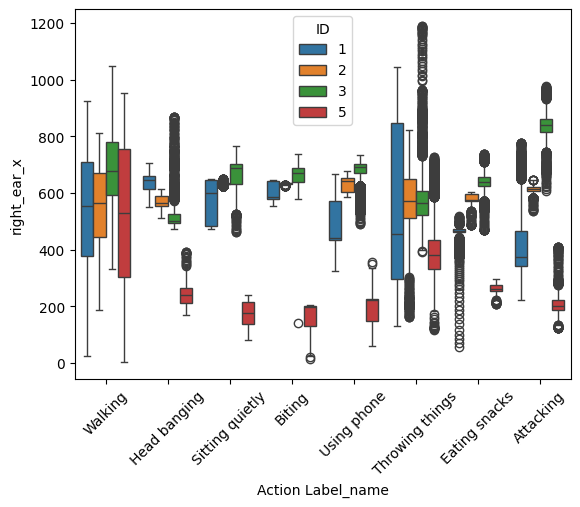

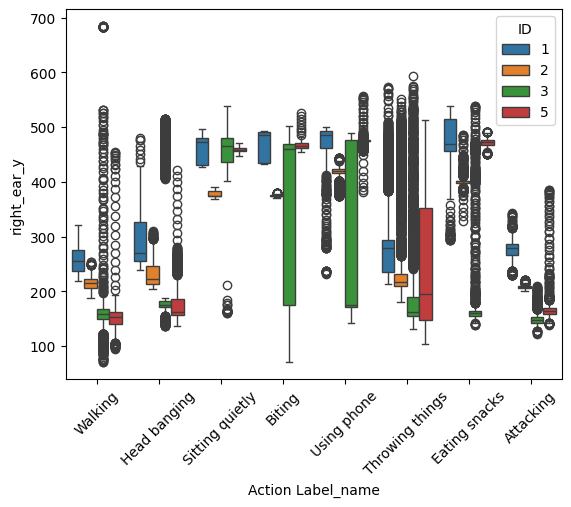

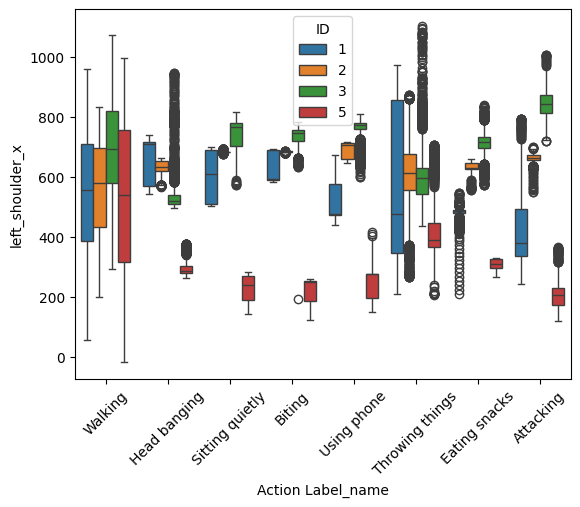

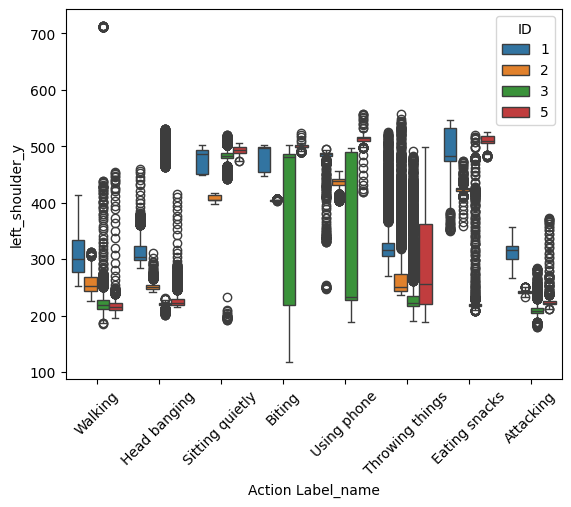

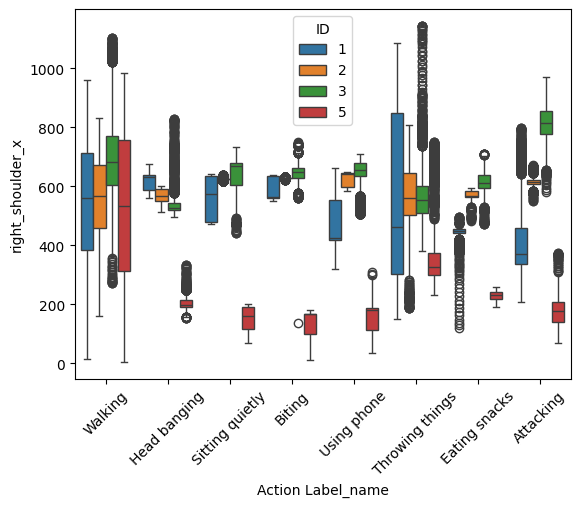

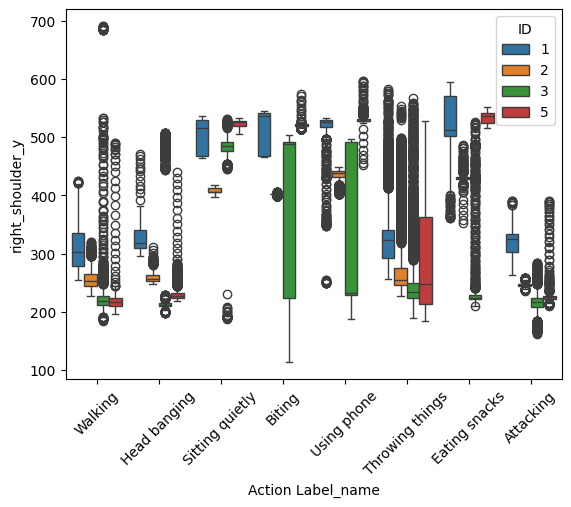

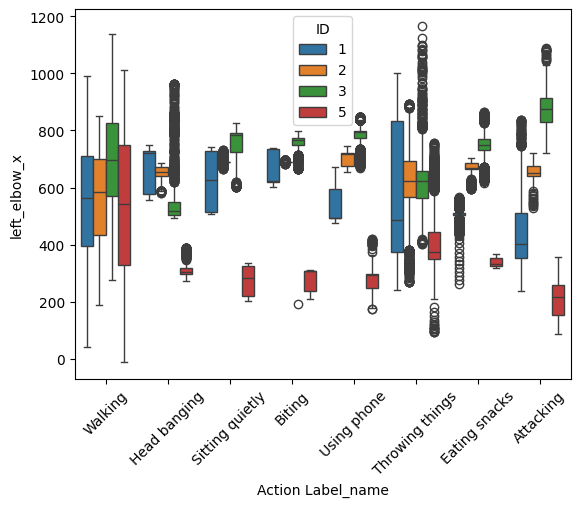

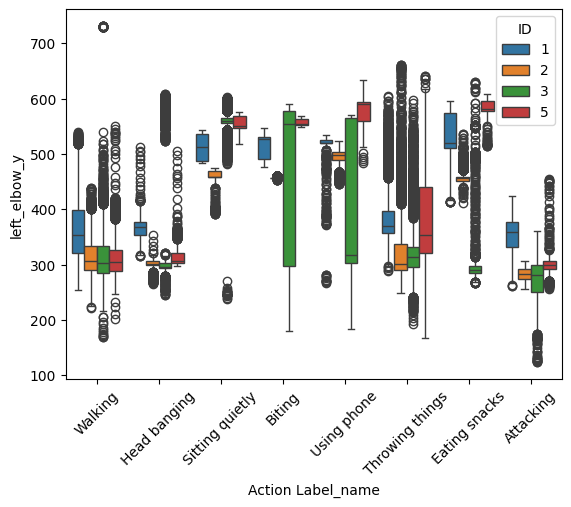

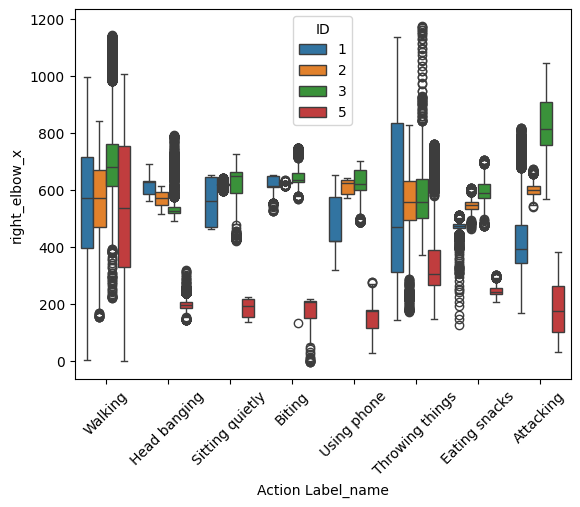

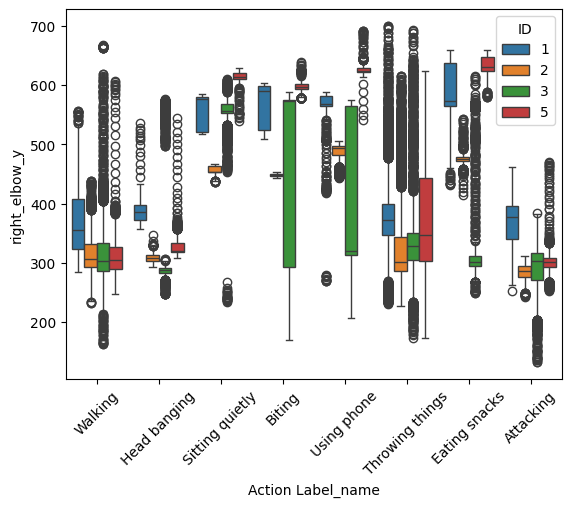

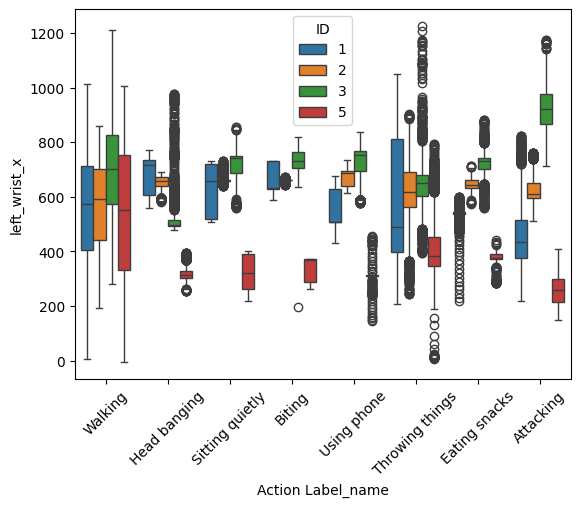

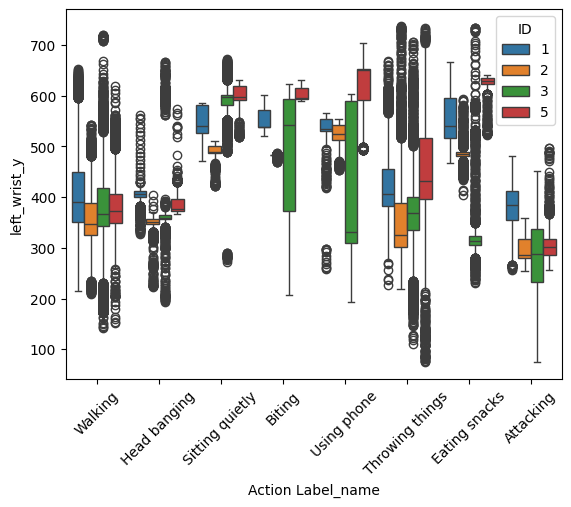

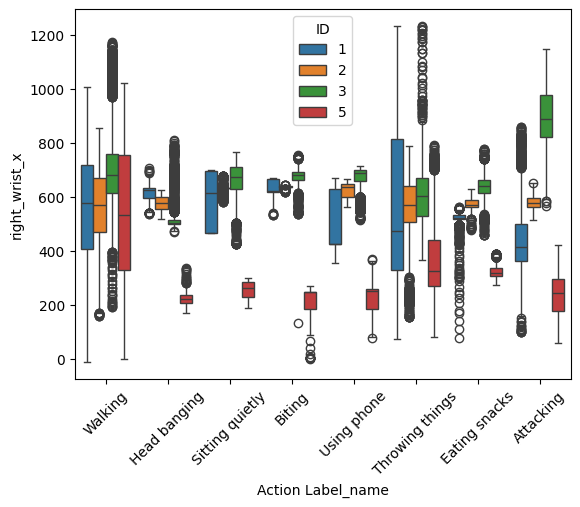

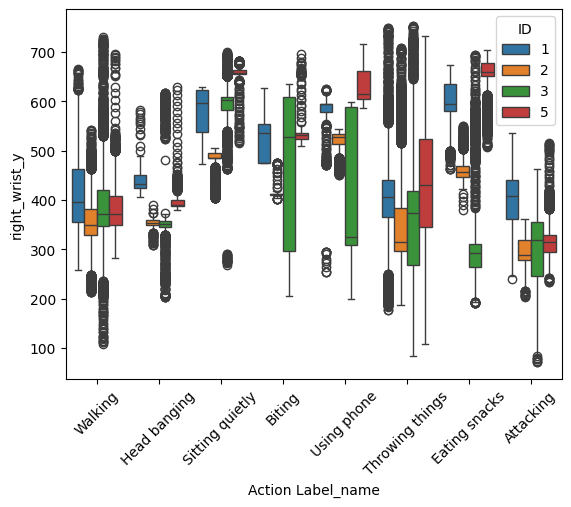

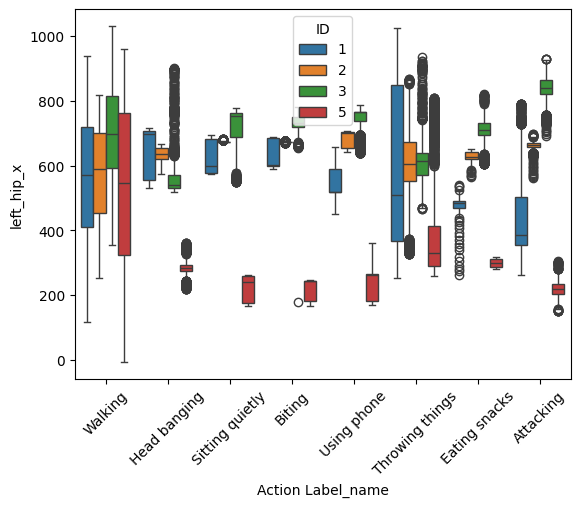

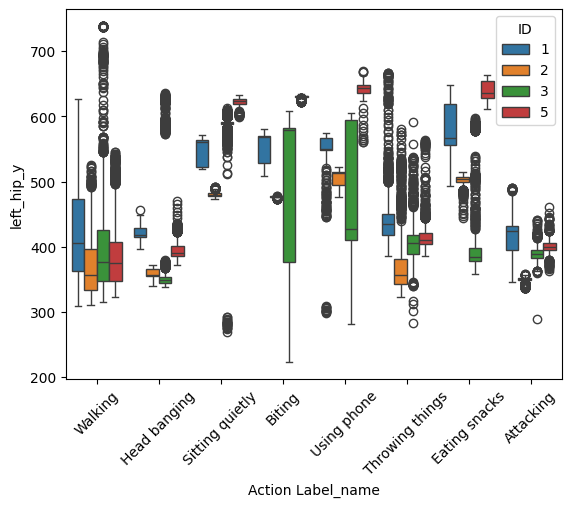

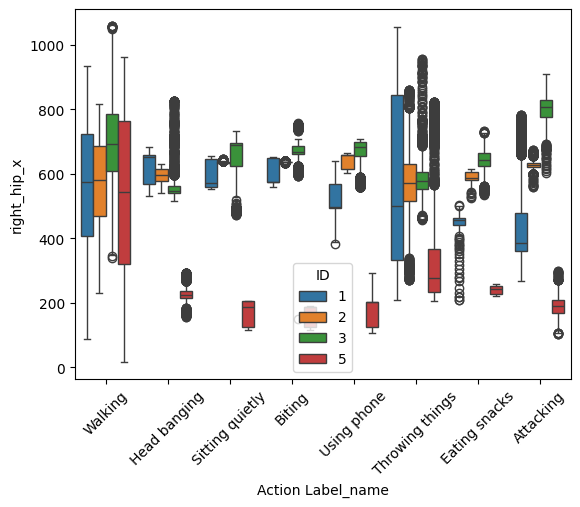

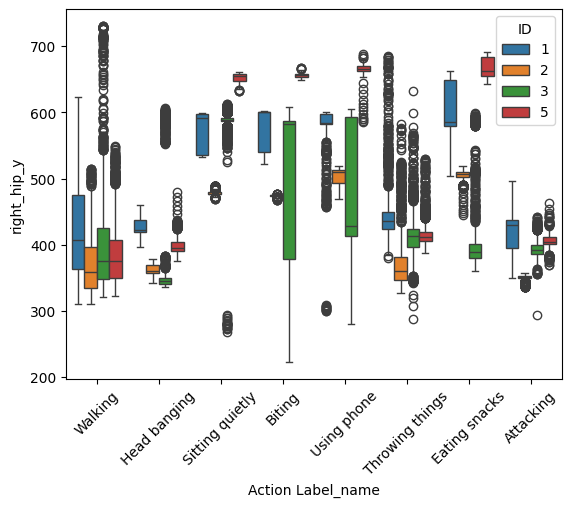

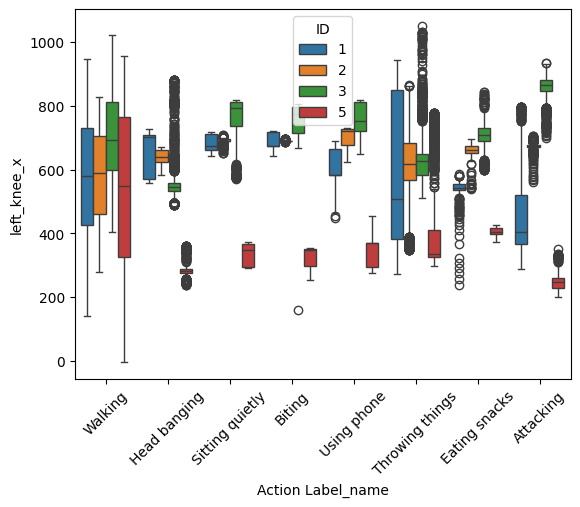

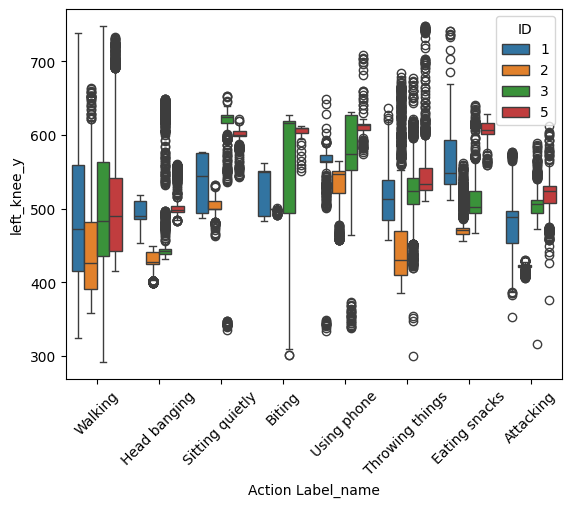

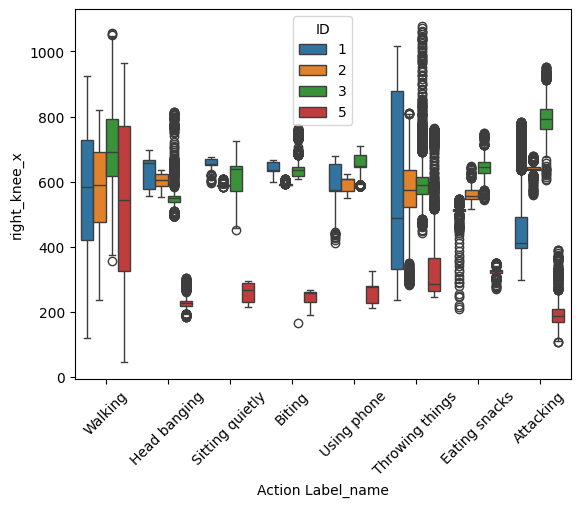

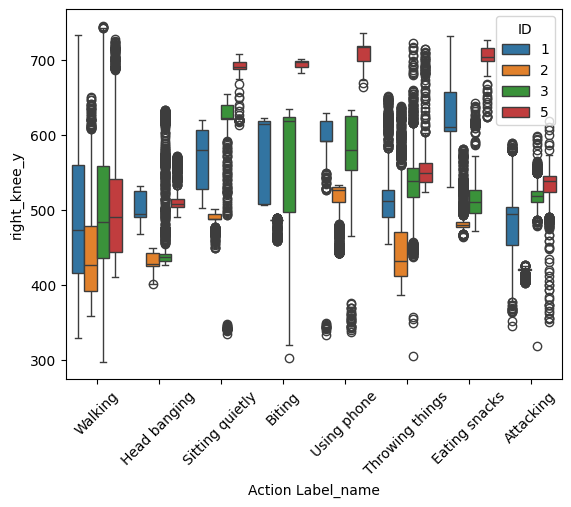

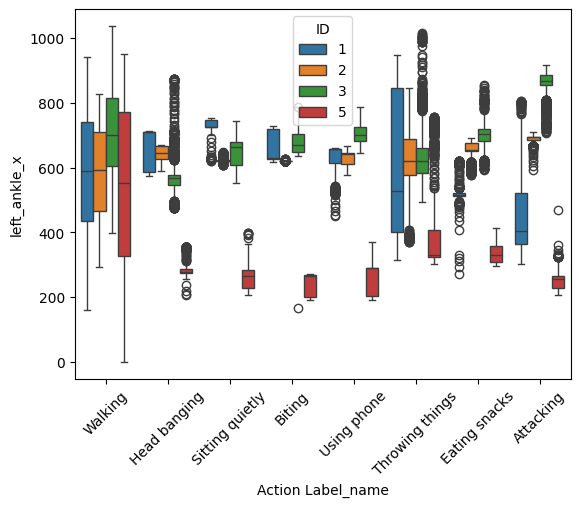

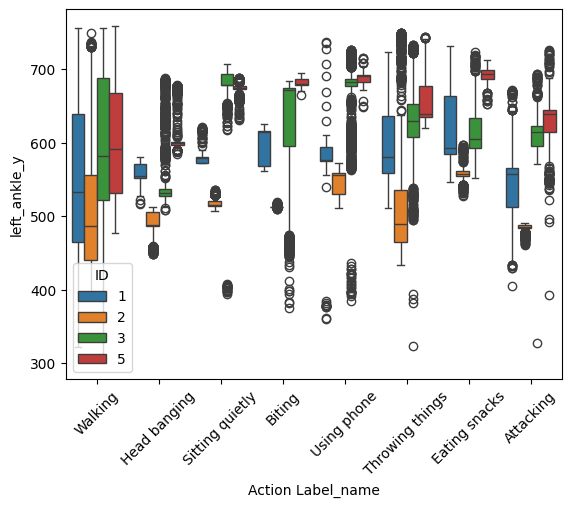

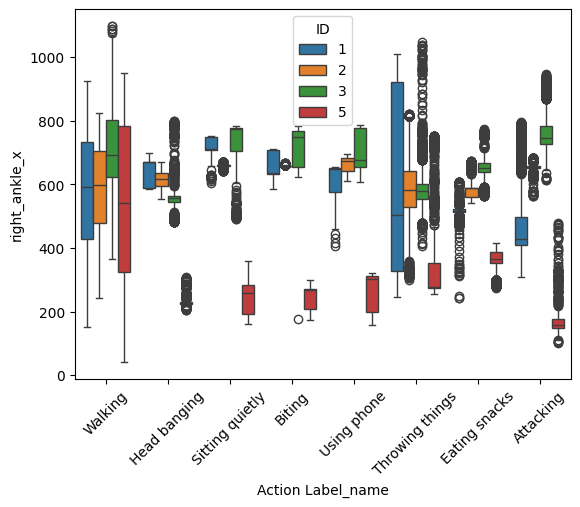

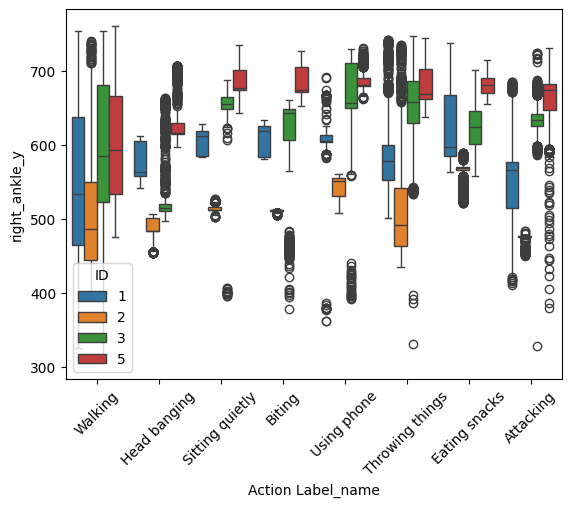

In [17]:
for col in data.columns:
    if col in ['Action Label','frame_id','Action Label_name', 'ID']:
        continue
    sns.boxplot(x='Action Label_name', y=col, data=final_df,hue='ID')
    plt.xticks(rotation=45)

    plt.show()

# Relative features extraction

## In this tutorial, I presented the relative position feature, which is the relative position of one body part to another. This tutorial will select left ear as basepoint for the feature.

### $$ relative\_position = position_A - position_B $$

### where $A,\;B $ is the part of body
#### <center>____________________!!!You should note that x, y axis matters!!!____________________</center>

In [ ]:

for col in final_df.columns:
    if col in ['Action Label','frame_id','ID','Action Label_name']:
        continue
    if col.endswith('_x'):
        final_df[col]=final_df['left_shoulder_x']-final_df[col]
    if col.endswith('_y'):
        final_df[col]=final_df['left_shoulder_y']-final_df[col]


In [19]:
final_df_train=final_df[final_df['ID']!=id_].drop('Action Label_name', axis=1)
final_df_test=final_df[final_df['ID']==id_].drop('Action Label_name', axis=1)

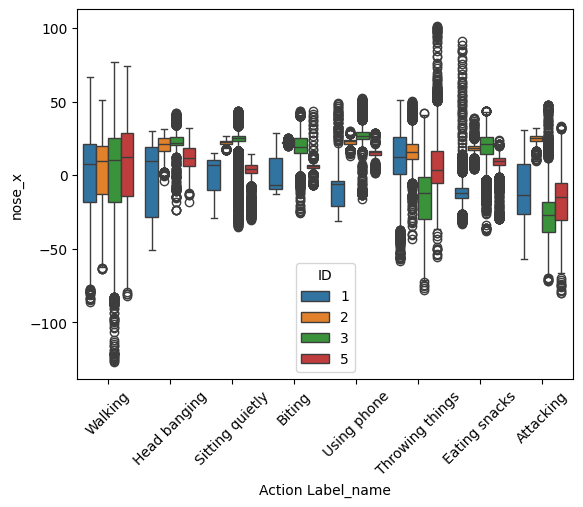

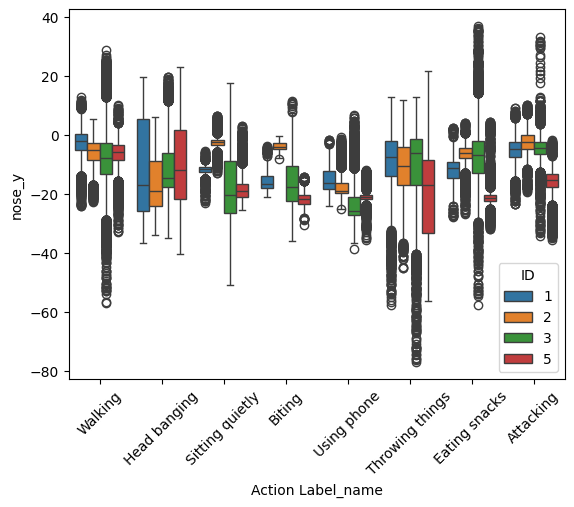

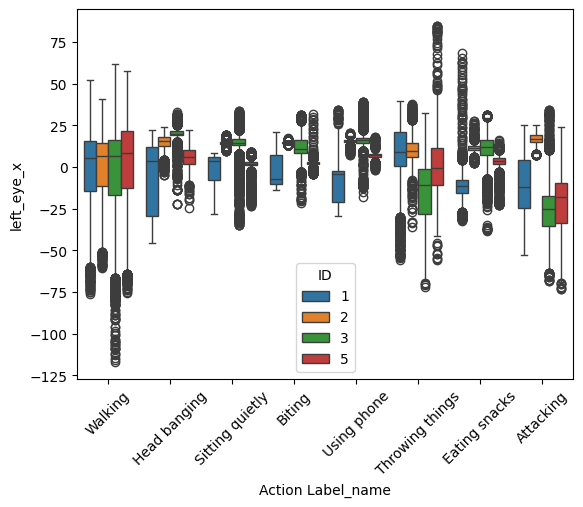

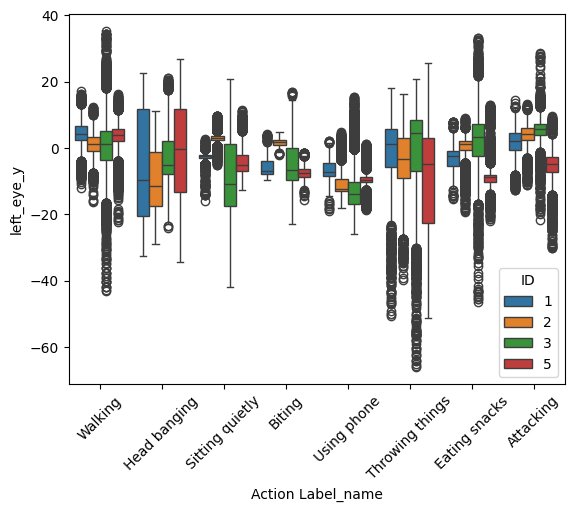

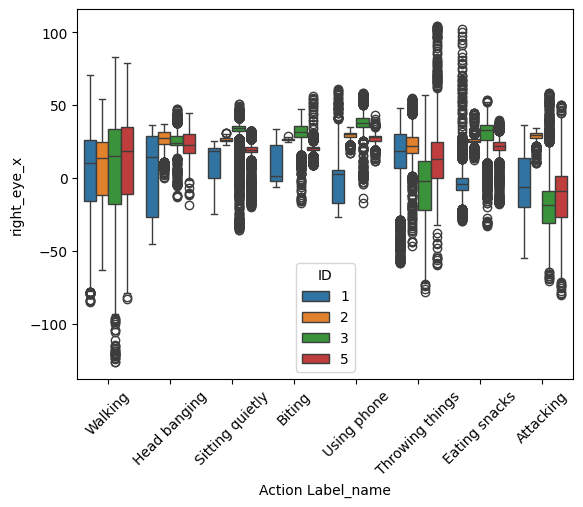

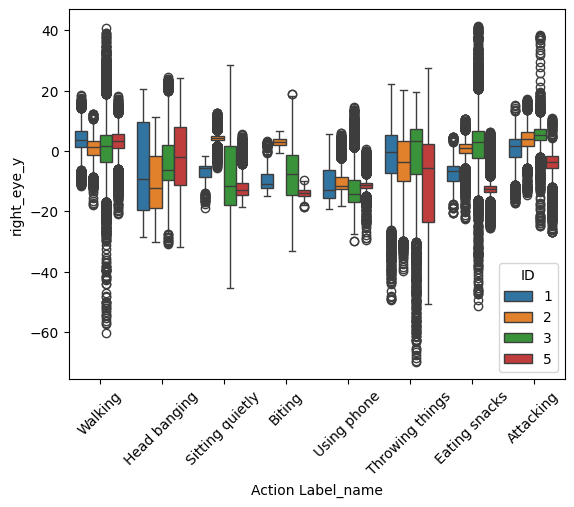

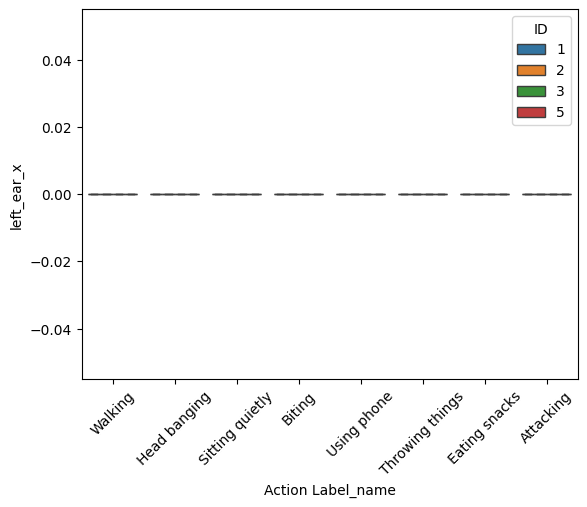

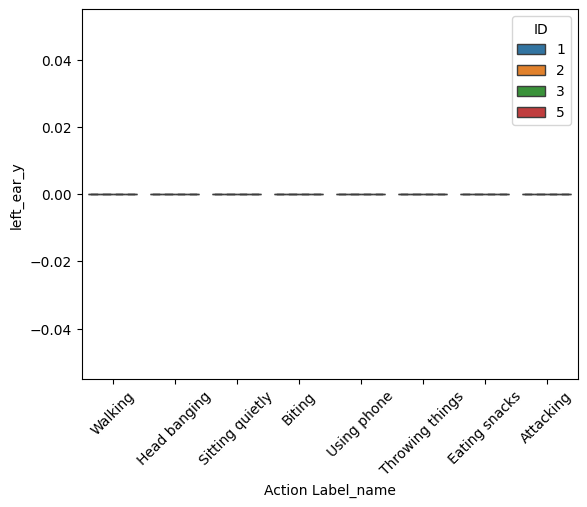

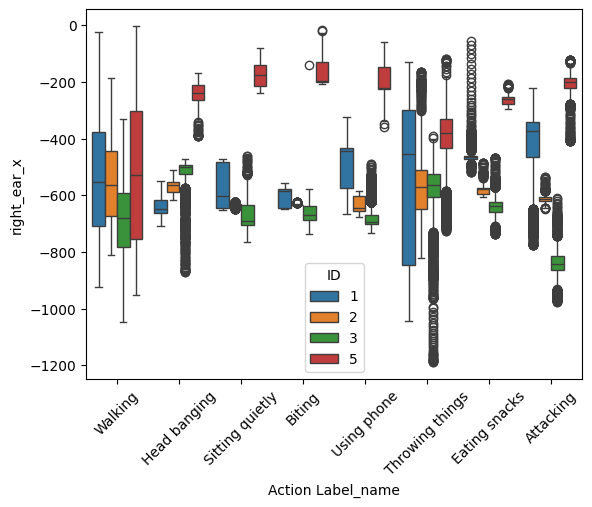

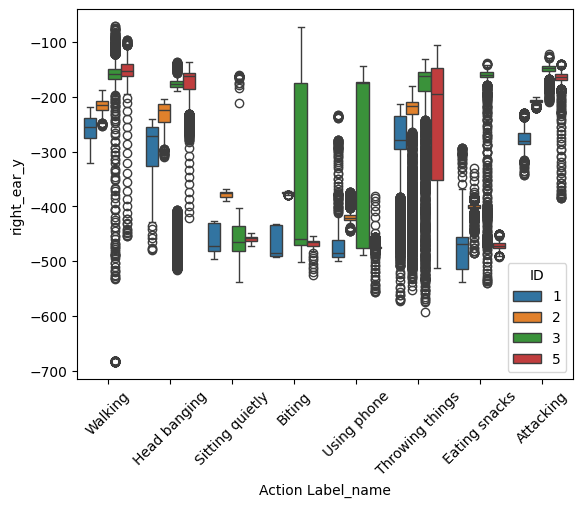

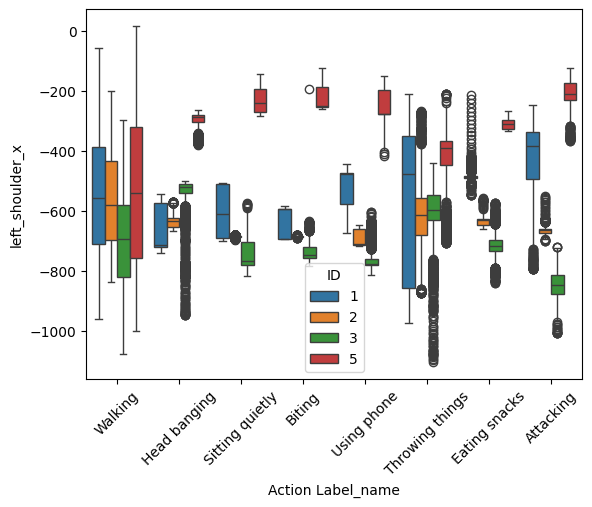

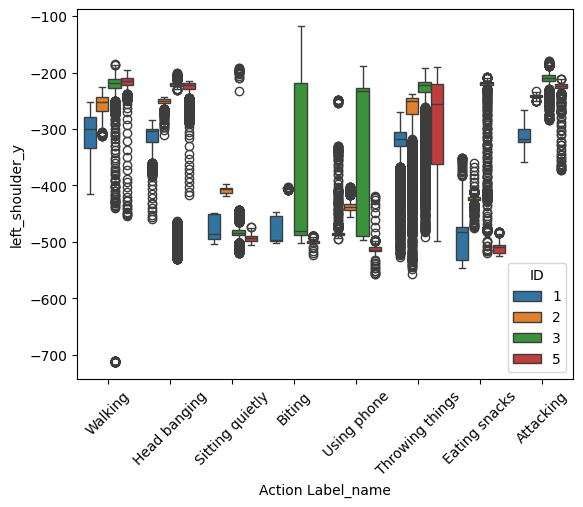

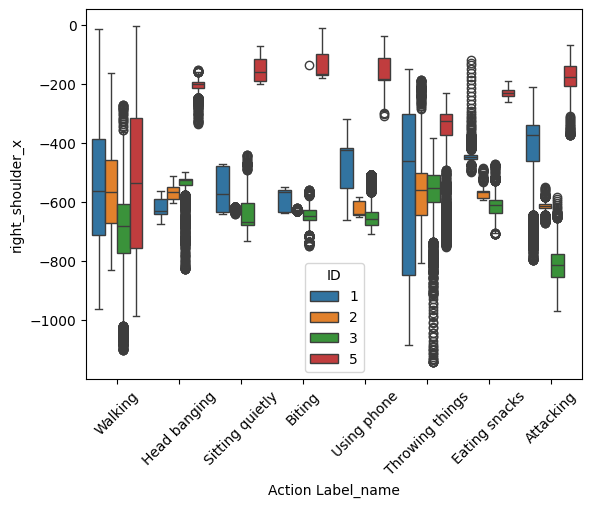

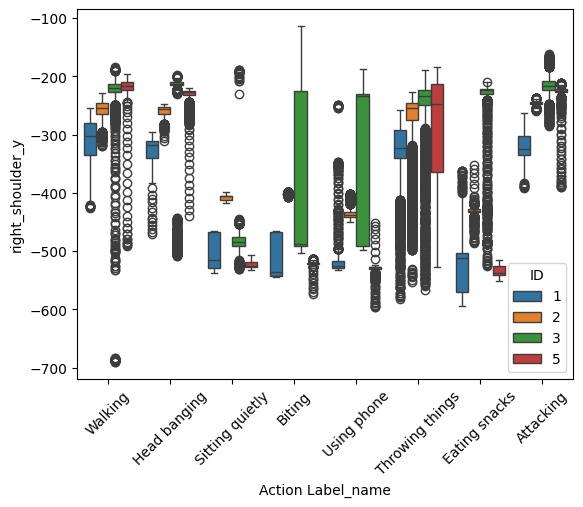

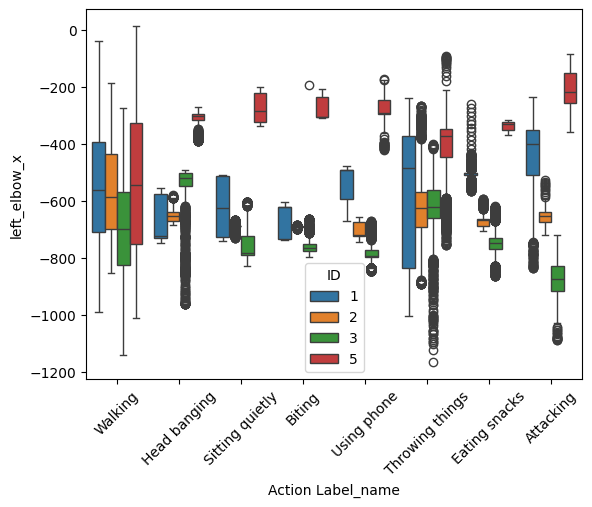

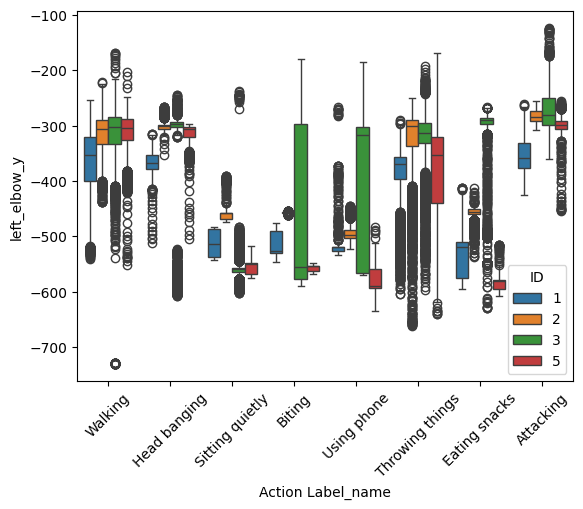

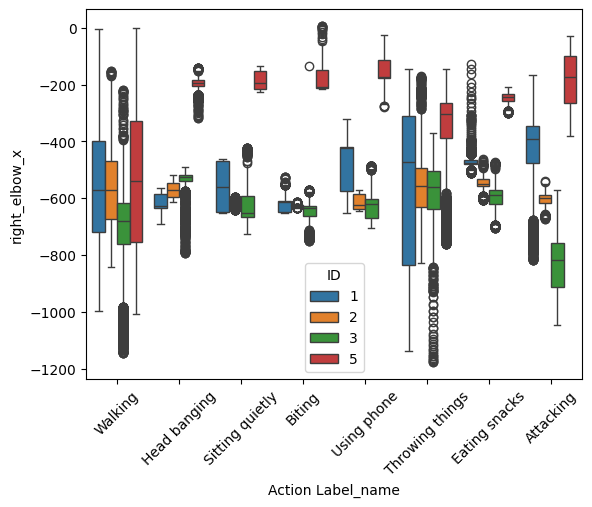

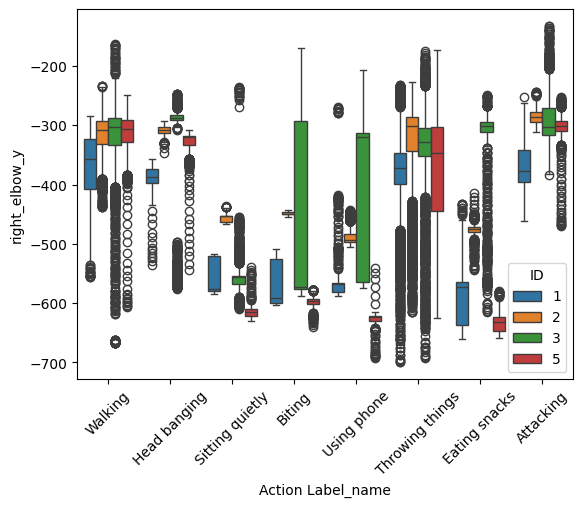

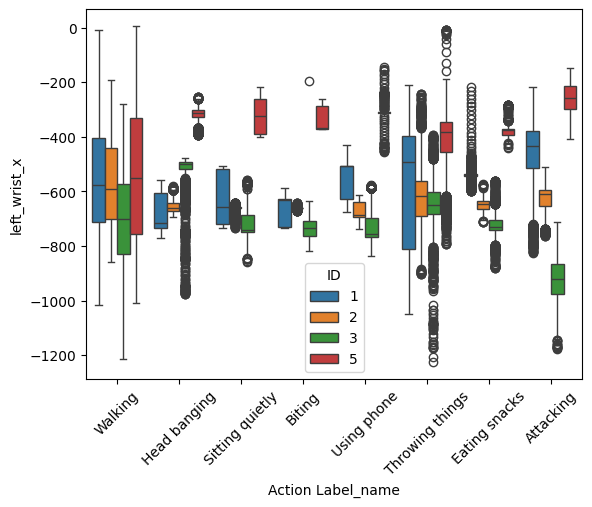

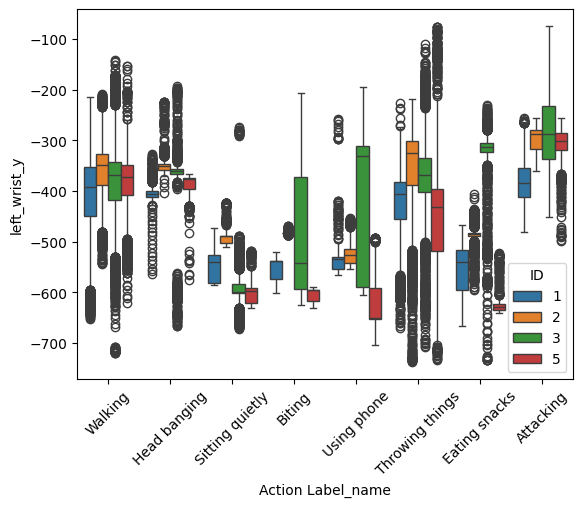

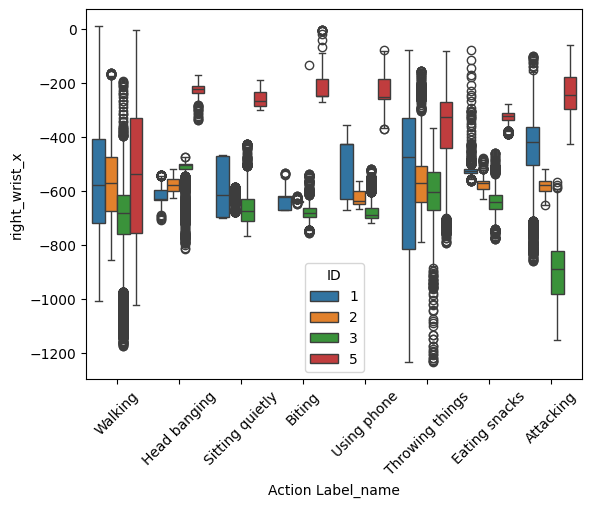

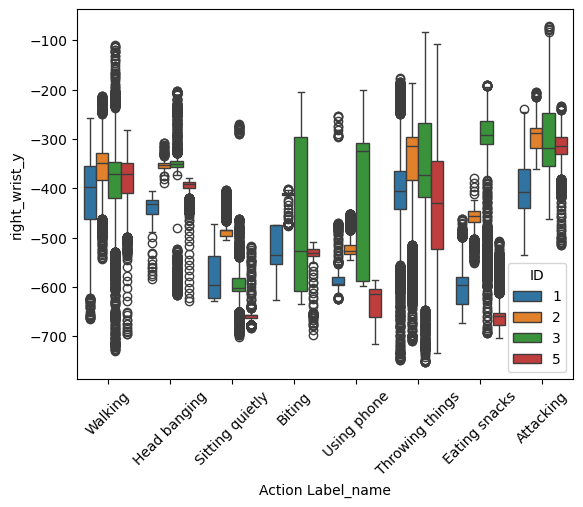

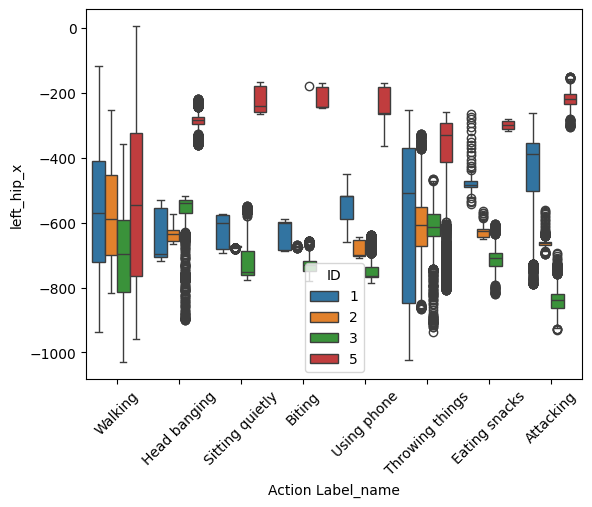

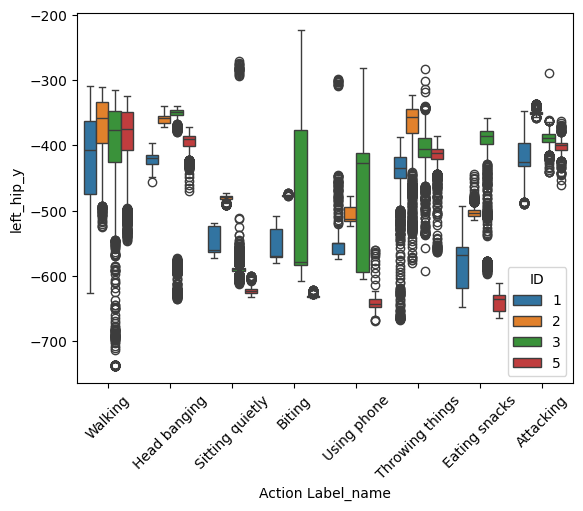

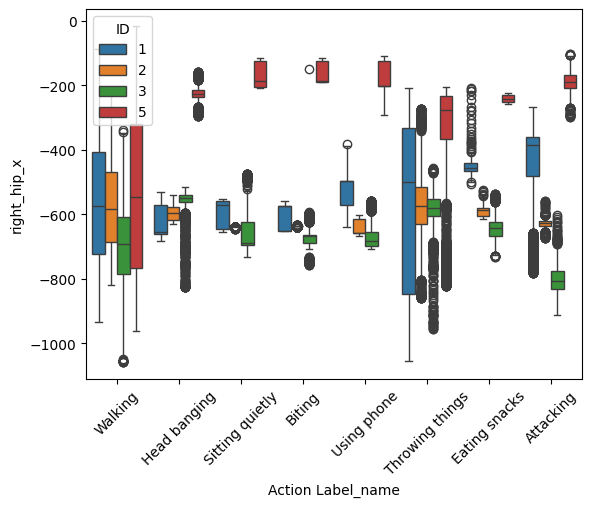

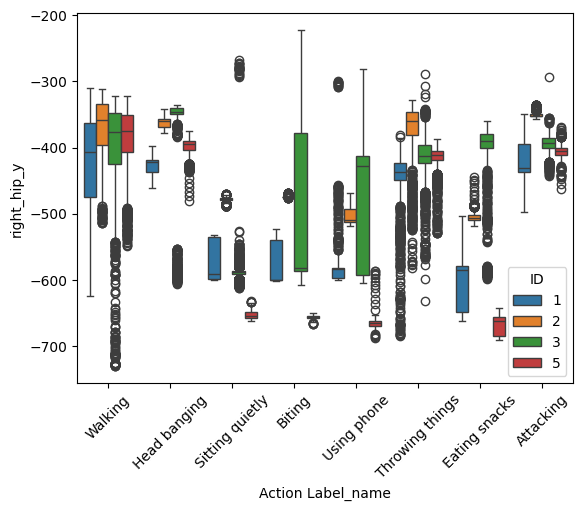

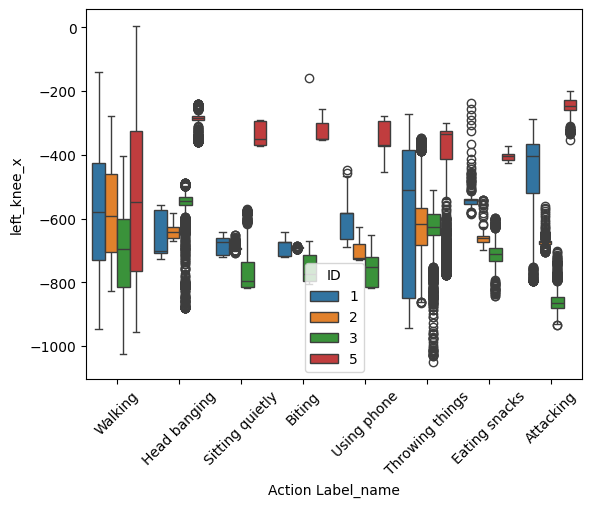

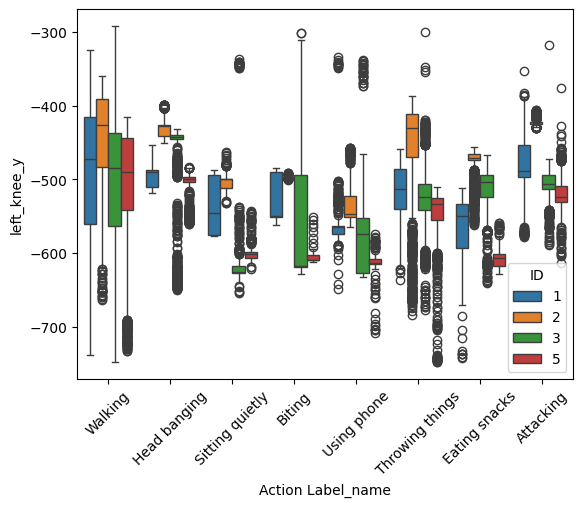

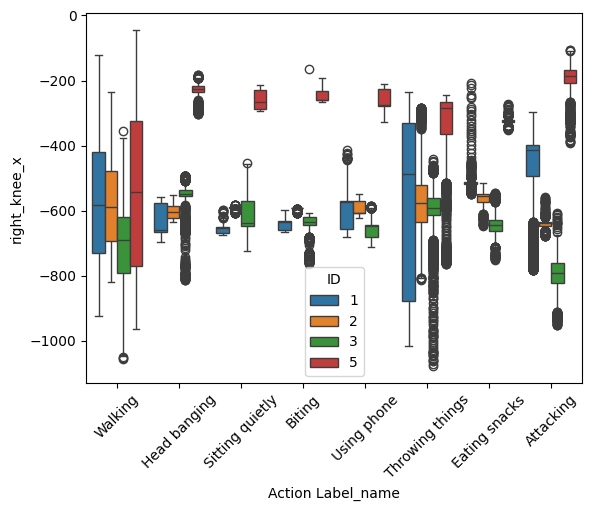

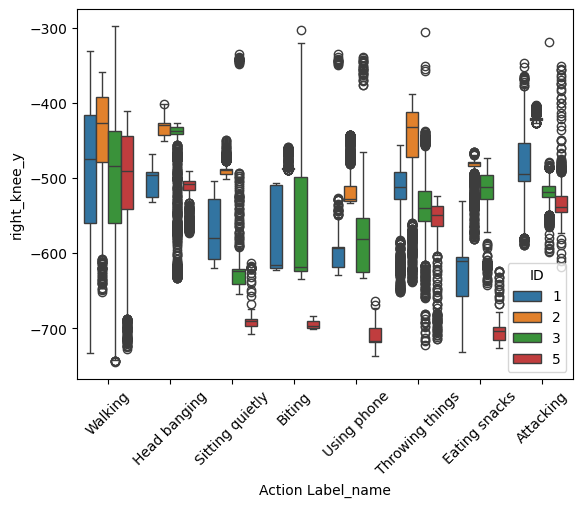

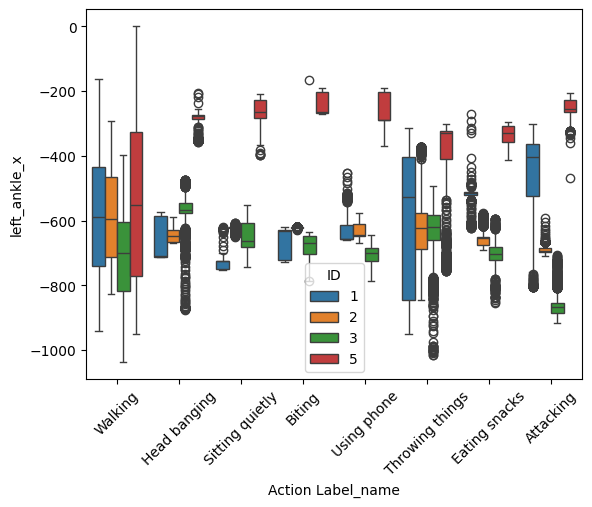

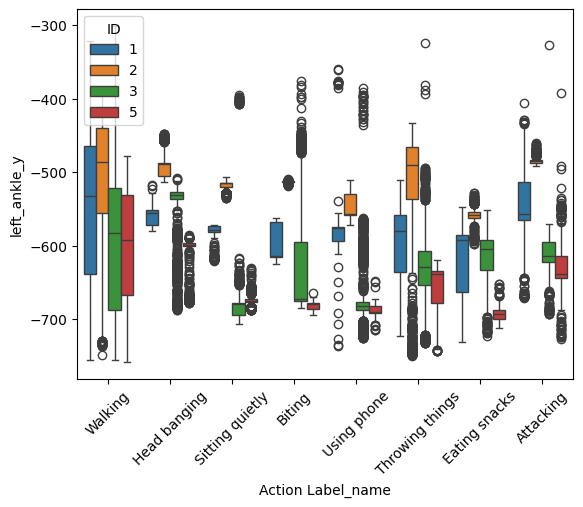

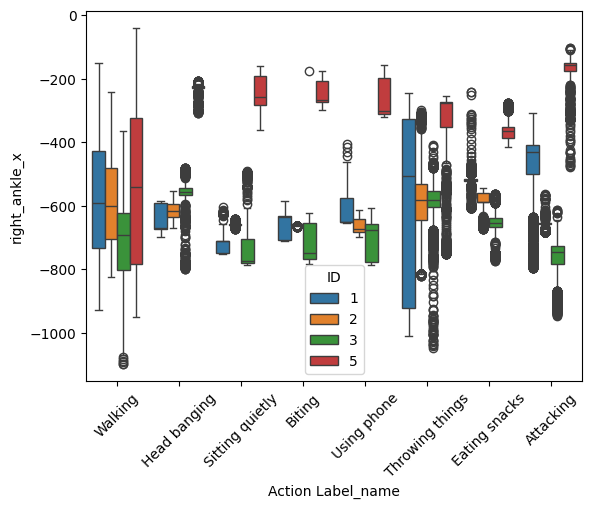

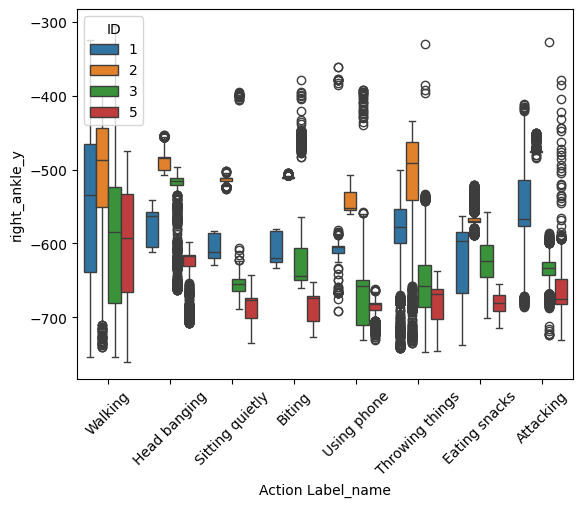

In [20]:
for col in data.columns:
    if col in ['Action Label','frame_id','Action Label_name', 'ID']:
        continue
    sns.boxplot(x='Action Label_name', y=col, data=final_df,hue='ID')
    plt.xticks(rotation=45)

    plt.show()

# You may define a function to extract more feature such as angle, or velocity, or acceleration:
### $$\theta=arccos(\frac{\overrightarrow{x}.\overrightarrow{y}}{ \|x\| \|y\|}) $$
### $$ Vel=\sqrt{\Delta x^2+\Delta y^2} $$
### $$ Acc=\Delta Vel $$

#### this part is for you :))))))))

In [21]:
import tsfel
cfg= tsfel.get_features_by_domain(['statistical','Custom','temporal'],json_path=personal_dir)
# You can chose from ['statistical', 'temporal', 'spectral', 'fractal', 'Custom'] domains


# Extract time series domain features using TSFEL
final_df_train_tsfel = tsfel.time_series_features_extractor(cfg, final_df_train,
                                                            window_size=30*window_duration, overlap=0.5, fs=30,
                                                            features_path=feature_path)
final_df_test_tsfel = tsfel.time_series_features_extractor(cfg, final_df_test, 
                                                           window_size=30*window_duration, overlap=0, fs=30,
                                                           features_path=feature_path)



In [22]:
# save Action Label as feature
label_train = final_df_train_tsfel['Action Label_Mode']
label_test = final_df_test_tsfel['Action Label_Mode']

# remove Action Label and id columns from train set
final_df_train_tsfel = final_df_train_tsfel.loc[:, ~final_df_train_tsfel.columns.str.contains('Action Label|id|ID')]
final_df_train_tsfel['Action Label'] = label_train  #add Action Label column back

# remove Action Label and id columns from test set
final_df_test_tsfel = final_df_test_tsfel.loc[:, ~final_df_test_tsfel.columns.str.contains('Action Label|id|ID')]
final_df_test_tsfel['Action Label'] = label_test #add Action Label column back

In [23]:
X_train = final_df_train_tsfel.drop(columns=['Action Label']).astype(float)
y_train= final_df_train_tsfel['Action Label'].astype(int)
X_test = final_df_test_tsfel.drop(columns=['Action Label']).astype(float)
y_test= final_df_test_tsfel['Action Label'].astype(int)

Accuracy: 0.6063157894736843
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.34      0.44        38
           1       0.12      1.00      0.21        19
           2       0.89      0.95      0.92        98
           3       0.63      1.00      0.78        26
           4       0.00      0.00      0.00        98
           5       1.00      0.42      0.59        26
           6       0.83      0.41      0.55        73
           7       1.00      0.99      0.99        97

    accuracy                           0.61       475
   macro avg       0.64      0.64      0.56       475
weighted avg       0.66      0.61      0.60       475



<Axes: >

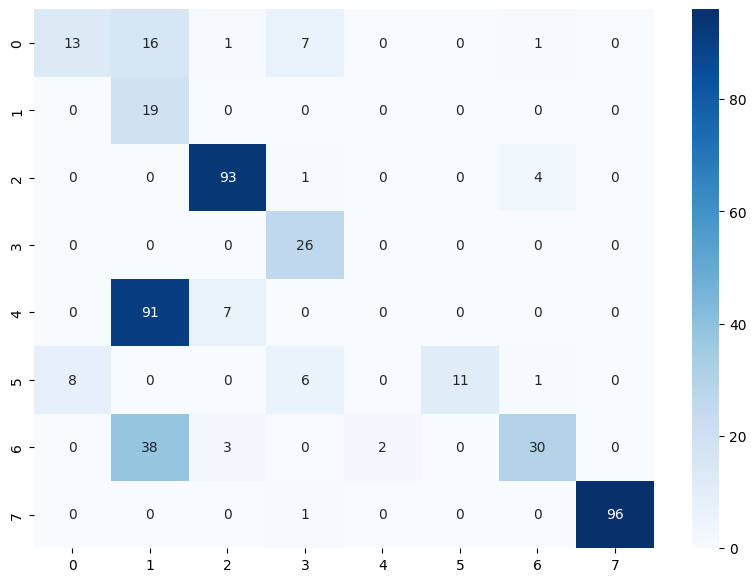

In [24]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# model = XGBClassifier(eval_metric='mlogloss',base_score=0.5, use_label_encoder=True)
model=HistGradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
ax,fig=plt.subplots(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt='d', cmap='Blues')

In [25]:
labels= label_encoder.classes_
labels

array(['Attacking', 'Biting', 'Eating snacks', 'Head banging',
       'Sitting quietly', 'Throwing things', 'Using phone', 'Walking'],
      dtype=object)

In [26]:

# import pandas as pd
# import matplotlib.pyplot as plt
# import os
# import numpy as np

# # Define the keypoints and their connections for drawing the skeleton.
# # This assumes a 17-point model similar to COCO.
# # Adjust KEYPOINT_NAMES and SKELETON_CONNECTIONS if your CSV uses a different set of keypoints.
# KEYPOINT_NAMES = [
#     'nose', 'left_eye', 'right_eye', 'left_ear', 'right_ear',
#     'left_shoulder', 'right_shoulder', 'left_elbow', 'right_elbow',
#     'left_wrist', 'right_wrist', 'left_hip', 'right_hip',
#     'left_knee', 'right_knee', 'left_ankle', 'right_ankle'
# ]

# SKELETON_CONNECTIONS = [
#     # Head
#     ('nose', 'left_eye'), ('nose', 'right_eye'),
#     ('left_eye', 'left_ear'), ('right_eye', 'right_ear'),
#     # Torso
#     ('left_shoulder', 'right_shoulder'), ('left_hip', 'right_hip'),
#     ('left_shoulder', 'left_hip'), ('right_shoulder', 'right_hip'),
#     # Left arm
#     ('left_shoulder', 'left_elbow'), ('left_elbow', 'left_wrist'),
#     # Right arm
#     ('right_shoulder', 'right_elbow'), ('right_elbow', 'right_wrist'),
#     # Left leg
#     ('left_hip', 'left_knee'), ('left_knee', 'left_ankle'),
#     # Right leg
#     ('right_hip', 'right_knee'), ('right_knee', 'right_ankle')
# ]

# # --- Configuration ---



# def draw_pose(pose_data_row, frame_id, action_label):
#     """
#     Draws a single pose and saves it as an image.

#     Args:
#         pose_data_row (pd.Series): A row from the DataFrame containing keypoint coordinates and label.
#         frame_id (int): The identifier for this frame (e.g., row index).
#         action_label (str): The action label for this pose.
#     """
#     if frame_id % 100 != 0:  # Print progress every 100 frames
#         return
#     keypoints = {}
#     valid_keypoints_present = False
#     for kp_name in KEYPOINT_NAMES:
#         x_col, y_col = f'{kp_name}_x', f'{kp_name}_y'
#         if x_col in pose_data_row and y_col in pose_data_row:
#             x, y = pose_data_row[x_col], pose_data_row[y_col]
#             # Check if coordinates are valid numbers (not NaN)
#             if pd.notna(x) and pd.notna(y):
#                 keypoints[kp_name] = (float(x), float(y))
#                 valid_keypoints_present = True
#         else:
#             # print(f"Warning: Keypoint columns {x_col} or {y_col} not found for frame {frame_id}.")
#             pass # Silently skip if columns are missing

#     if not valid_keypoints_present:
#         print(f"Skipping frame {frame_id} for label '{action_label}' due to no valid keypoints.")
#         return

#     fig, ax = plt.subplots(figsize=IMAGE_FIGSIZE)

#     # Plot connections
#     for kp_name1, kp_name2 in SKELETON_CONNECTIONS:
#         if kp_name1 in keypoints and kp_name2 in keypoints:
#             x1, y1 = keypoints[kp_name1]
#             x2, y2 = keypoints[kp_name2]
#             ax.plot([x1, x2], [y1, y2], color=SKELETON_LINE_COLOR, linewidth=SKELETON_LINE_WIDTH, zorder=1)

#     # Plot keypoints
#     for kp_name, (x, y) in keypoints.items():
#         ax.plot(x, y, 'o', color=JOINT_COLOR, markersize=JOINT_SIZE, zorder=2)
#     # hide x and y ticks
#     ax.set_xticks([])
#     ax.set_yticks([])
#     # hide the border
#     for spine in ax.spines.values():
#         spine.set_visible(False)

#     # Set plot appearance
#     # ax.set_title(f'Action: {action_label} - Frame: {frame_id}')
#     # ax.set_xlabel('X coordinate')
#     # ax.set_ylabel('Y coordinate')
    
#     # Invert Y axis to match typical image coordinate systems (origin at top-left)
#     ax.invert_yaxis()
#     # Ensure aspect ratio is equal so the skeleton is not distorted
#     ax.set_aspect('equal', adjustable='box')
    
#     # Determine plot limits based on keypoint data
#     all_x = [kp[0] for kp in keypoints.values()]
#     all_y = [kp[1] for kp in keypoints.values()]

#     if all_x and all_y: # Ensure there are points to calculate limits from
#         min_x, max_x = min(all_x), max(all_x)
#         min_y, max_y = min(all_y), max(all_y)
        
#         # Add some padding
#         padding_x = (max_x - min_x) * 0.1 if (max_x - min_x) > 0 else 10
#         padding_y = (max_y - min_y) * 0.1 if (max_y - min_y) > 0 else 10
        
#         ax.set_xlim(min_x - padding_x, max_x + padding_x)
#         ax.set_ylim(max_y + padding_y, min_y - padding_y) # Y-axis is inverted
#     else: # Default view if no keypoints or single keypoint
#         ax.autoscale_view()


#     # Create directory and save image
#     output_dir = os.path.join(OUTPUT_BASE_DIR, str(action_label))
#     os.makedirs(output_dir, exist_ok=True)
    
#     # Sanitize frame_id for filename (if it could be non-integer or problematic)
#     safe_frame_id = str(frame_id).replace('/', '_').replace('\\', '_')
#     output_path = os.path.join(output_dir, f'{safe_frame_id}.png')
    
#     try:
#         plt.savefig(output_path)
#         # print(f'Saved: {output_path}')
#     except Exception as e:
#         print(f"Error saving figure {output_path}: {e}")
#     finally:
#         plt.close(fig) # Close the figure to free memory

# def main():
#     # Check if CSV file exists
#     if not os.path.exists(CSV_FILE_PATH):
#         print(f"Error: CSV file not found at '{CSV_FILE_PATH}'")
#         print("Please make sure the file is in the same directory as the script, or provide the full path.")
#         return

#     # Load the dataset
#     try:
#         df = pd.read_csv(CSV_FILE_PATH)
#     except Exception as e:
#         print(f"Error reading CSV file: {e}")
#         return

#     # Ensure the 'label' column exists
#     if 'Action Label' not in df.columns:
#         print("Error: 'label' column not found in the CSV file.")
#         print(f"Available columns are: {df.columns.tolist()}")
#         return
        
#     print(f"Processing {len(df)} poses from '{CSV_FILE_PATH}'...")

#     # Iterate over each row (pose) in the DataFrame
#     for index, row in df.iterrows():
#         action_label = row['Action Label']
#         # Sanitize action_label for directory name
#         # Replace characters that are problematic for directory names
#         safe_action_label = str(action_label).replace('/', '_').replace('\\', '_').replace(':', '_').replace('*', '_').replace('?', '_').replace('"', '_').replace('<', '_').replace('>', '_').replace('|', '_').strip()
#         if not safe_action_label: # Handle empty or whitespace-only labels
#             safe_action_label = "unknown_action"
            
#         draw_pose(row, index, safe_action_label)
#         if (index + 1) % 50 == 0: # Print progress every 50 frames
#              print(f"Processed {index + 1}/{len(df)} frames...")


#     print(f"Finished processing. Skeleton images saved in '{OUTPUT_BASE_DIR}'")
# for i in os.listdir('./real_data'):
#     id=i.split('.')[0].split('_')[-1]
#     CSV_FILE_PATH = f'./real_data/keypoints_with_labels_{id}.csv'
#     OUTPUT_BASE_DIR = f'./skeleton_frames/{id}'
#     IMAGE_FIGSIZE = (8, 8)  # Width, Height in inches for the output image
#     SKELETON_LINE_COLOR = 'cornflowerblue'
#     SKELETON_LINE_WIDTH = 2
#     JOINT_COLOR = 'orangered'
#     JOINT_SIZE = 5
#     main()